**Определение уровня стресса по физиологическим показателям (Stress Detection)**

Ссылка на набор данных: https://www.kaggle.com/code/dheerov/stress-detection/input

Описание данных:

**snoring range** (диапазон храпа) - громкость храпа в дБ (dB), значения дробные с точностью до сотых, количественный, непрерывный;

**respiration rate** (частота дыхания) - количество дыхательных циклов в минуту (breaths per minute, bpm), значения дробные с точностью до сотых, количественный, непрерывный;

**body tempreture** (температура тела) - температура тела в градусах по Фаренгейту (°F), значения дробные с точностью до сотых, количественный, непрерывный;

**limb movement** (движение конечностей) - количество движений конечностей в час (movements per hour), значения дробные с точностью до сотых, количественный, непрерывный;

**blood oxygen** (сатурация) - доля насыщенного кислородом гемоглобина в крови относительно общего гемоглобина в крови (%), значения дробные с точностью до сотых, количественный, непрерывный;

**eye movement** (движение глаз) - количество движений глаз в час (movements per hour), значения дробные с точностью до сотых, количественный, непрерывный;

**hours of sleep** (количество часов сна) - часы сна (Hours), значения дробные с точностью до сотых, количественный, непрерывный;

**heart rate** (частота сердечных сокращений) - средняя частота сердечных сокращений в минуту (beats per minute, bpm), значения дробные с точностью до сотых, количественный, непрерывный;

**Stress levels** (уровень стресса) - уровень стресса по шкале от 0 до 4 (Stress Level), значения целые, категориальный.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import ListedColormap
import scipy.stats as stats
from sklearn.metrics import classification_report

In [3]:
# Настройка параметров отображения для вывода всех строк
pd.set_option('display.max_rows', None)

In [60]:
# Настройка параметров отображения для вывода в обычном формате
pd.options.display.float_format = '{:.6f}'.format

In [90]:
data = pd.read_csv(r'C:\Users\ela96\Downloads\data_stress.csv')
data.head(10)

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.800000,25.680000,91.840000,16.600000,89.840000,99.600000,1.840000,74.200000,3
1,91.640000,25.104000,91.552000,15.880000,89.552000,98.880000,1.552000,72.760000,3
2,60.000000,20.000000,96.000000,10.000000,95.000000,85.000000,7.000000,60.000000,1
3,85.760000,23.536000,90.768000,13.920000,88.768000,96.920000,0.768000,68.840000,3
4,48.120000,17.248000,97.872000,6.496000,96.248000,72.480000,8.248000,53.120000,0
5,56.880000,19.376000,95.376000,9.376000,94.064000,83.440000,6.376000,58.440000,1
6,47.000000,16.800000,97.200000,5.600000,95.800000,68.000000,7.800000,52.000000,0
7,50.000000,18.000000,99.000000,8.000000,97.000000,80.000000,9.000000,55.000000,0
8,45.280000,16.112000,96.168000,4.224000,95.112000,61.120000,7.112000,50.280000,0
9,55.520000,19.104000,95.104000,9.104000,93.656000,82.760000,6.104000,57.760000,1


In [71]:
data.shape

(630, 9)

In [91]:
data.columns = data.columns.str.strip()  # Убираем лишние пробелы
data.columns

Index(['snoring range', 'respiration rate', 'body temperature',
       'limb movement', 'blood oxygen', 'eye movement', 'hours of sleep',
       'heart rate', 'Stress Levels'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring range     630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  614 non-null    float64
 3   limb movement     618 non-null    float64
 4   blood oxygen      626 non-null    float64
 5   eye movement      612 non-null    float64
 6   hours of sleep    619 non-null    float64
 7   heart rate        606 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


Типы данных корректны, соответствуют тем, которые нужны.

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(630, 9)

Размер датасета не изменился, дубликатов не было.

In [10]:
data.describe()

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
count,630.000000,630.000000,614.000000,618.000000,626.000000,612.000000,619.000000,606.000000,630.000000
mean,71.600000,21.916314,93.472055,11.945188,91.047920,88.964673,3.835742,64.901733,2.000000
std,19.372833,4.336242,6.833370,5.001250,4.891833,13.480426,3.341316,11.260908,1.415337
min,45.000000,16.000000,85.000000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.580000,8.516000,88.484000,81.230000,0.472000,56.210000,1.000000
50%,70.000000,21.016000,93.080000,11.048000,91.000000,90.080000,3.608000,62.540000,2.000000
75%,91.250000,25.064000,95.596000,15.950000,94.274000,98.890000,6.592000,72.740000,3.000000
max,100.000000,48.560000,166.230000,46.800000,154.300000,185.360000,20.220000,158.650000,4.000000


Диапазоны значений:

snoring range: 45.0-100.0 dB

respiration rate: 16.0-48.56 bpm

body temperature: 85.0-166.23 (115.7) °F

limb movement: 4.0-46.8 movements per hour

blood oxygen: 82.0-154.3 (100.0)%

eye movement: 60.0-185.36 movements per hour

hours of sleep: 0.0-20.22 hours

heart rate: 50.0-158.65 bpm

Stress Levels: 0, 1, 2, 3, 4

В данных явно есть ошибочные значения, которые не имеют биологического смысла, например, body temperature или blood oxygen. Также вызывает сомнения значение для hours of sleep = 20.22, теоретически возможное, но нужно изучить более пристально. Проверим и остальные значения, которые существенно отклоняются от предполагаемых диапазонов нормы.

In [11]:
features = data.columns[:-1]  # Все столбцы, кроме "Stress Levels"

# способ "вылавливания" выбросов позаимствован у Саши

# Функция для поиска выбросов с помощью IQR
def iqr(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (group < lower) | (group > upper)

# Список для хранения информации о выбросах
outliers_info = []

## Поиск выбросов для каждого уровня стресса и каждого количественного признака
#for stress_level in data['Stress Levels'].unique():
#    data_tmp = data[data['Stress Levels'] == stress_level]
#    for col in features:
#        outliers = iqr(data_tmp[col])
#        outlier_indices = data_tmp.index[outliers].tolist()
#        outliers_info.append({'stress_level': stress_level, 'feature': col, 'outlier_indices': outlier_indices})

# переворачиваю        
        
# Поиск выбросов для каждого количественного признака и каждого уровня стресса
for col in features:
    for stress_level in sorted(data['Stress Levels'].unique()):
        data_tmp = data[data['Stress Levels'] == stress_level]
        outliers = iqr(data_tmp[col])
        outlier_indices = data_tmp.index[outliers].tolist()
        outliers_info.append({'stress_level': stress_level, 'feature': col, 'outlier_indices': outlier_indices})
        
      
# Теперь данные:     

# Вывод строк с выбросами
for info in outliers_info:
    stress_level = info['stress_level']
    feature = info['feature']
    outlier_indices = info['outlier_indices']
    if outlier_indices:
#        print(f"Outliers in 'Stress Levels' {stress_level} for feature '{feature}':")
#        print(data.loc[outlier_indices])
#        print("\n")
        print(f"Outliers for feature {feature} in 'Stress Levels' '{stress_level}':")
        print(data.loc[outlier_indices])
        print("\n")

Outliers for feature respiration rate in 'Stress Levels' '2':
     snoring range  respiration rate  body temperature  limb movement  \
625           69.6              46.5             92.96          10.96   

     blood oxygen  eye movement  hours of sleep  heart rate  Stress Levels  
625         90.96          89.8             NaN        62.4              2  


Outliers for feature respiration rate in 'Stress Levels' '3':
     snoring range  respiration rate  body temperature  limb movement  \
244          80.96             46.89            90.128          12.32   
255          92.96             48.56            91.728          16.32   

     blood oxygen  eye movement  hours of sleep  heart rate  Stress Levels  
244        88.128         95.32           0.128       65.64              3  
255        89.728         99.32           1.728       73.64              3  


Outliers for feature body temperature in 'Stress Levels' '1':
     snoring range  respiration rate  body temperature  li

In [12]:
# Объединение всех индексов выбросов
all_outlier_indices = []
for info in outliers_info:
    all_outlier_indices.extend(info['outlier_indices'])
    
outliers_tmp = data.loc[all_outlier_indices]

In [13]:
outliers_tmp['Outlier Feature'] = None  # Инициализируем колонку с None

# Заполнение колонки 'Outlier Feature'
for info in outliers_info:
    feature = info['feature']
    outlier_indices = info['outlier_indices']
    outliers_tmp.loc[outlier_indices, 'Outlier Feature'] = feature

outliers_tmp

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels,Outlier Feature
625,69.600,46.500,92.960,10.960,90.960,89.80,NaN,62.40,2,respiration rate
244,80.960,46.890,90.128,12.320,88.128,95.32,0.128,65.64,3,respiration rate
255,92.960,48.560,91.728,16.320,89.728,99.32,1.728,73.64,3,respiration rate
162,55.760,19.152,153.600,9.152,93.728,82.88,6.152,57.88,1,body temperature
329,74.080,21.408,166.230,11.408,91.408,92.04,4.112,63.52,2,body temperature
214,93.080,25.488,152.300,16.360,89.744,99.36,1.744,NaN,3,body temperature
333,84.680,23.248,132.850,13.560,88.624,96.56,0.624,68.12,3,body temperature
129,97.568,27.568,127.360,17.784,84.352,101.96,0.000,78.92,4,body temperature
274,98.656,28.656,140.360,18.328,85.984,103.32,0.000,81.64,4,body temperature
508,99.008,29.008,141.650,18.504,86.512,103.76,0.000,82.52,4,body temperature


In [14]:
outliers_tmp.shape

(35, 10)

Так как физиологические показатели могут изменяться не только в зависимости от уровня стресса (могут влиять другие состояния,  различные заболевания, индивидуальные особенности), однозначно отнести к ошибочным нельзя те значения, которые не лишены биологического смысла. Возможно в более обширной выборке таких значений будет больше (достаточно) и выбросами они являться не будут. Исключение: значения для body temperature (все 8 значений) и blood oxygen (все 2 значения), которые не имеют биологического смысла - они точно ошибочные.
Кроме того явно ошибочные значения, когда hours of sleep = 0, так как исследование проходит во сне.
Проверим сколько таких значений.

In [35]:
zero_sleep_rows = data[data['hours of sleep'] == 0.0]

In [36]:
zero_sleep_rows

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
13,96.288,26.288,85.36,17.144,82.432,100.36,0.0,75.72,4
31,96.256,26.256,85.32,17.128,82.384,NaN,0.0,75.64,4
33,99.904,29.904,89.88,18.952,87.856,104.88,0.0,84.76,4
37,98.528,28.528,88.16,18.264,85.792,103.16,0.0,81.32,4
39,98.720,28.720,88.40,18.360,86.080,103.40,0.0,81.80,4
45,98.912,28.912,88.64,18.456,86.368,103.64,0.0,82.28,4
47,97.664,27.664,87.08,17.832,84.496,102.08,0.0,79.16,4
49,96.576,26.576,85.72,17.288,82.864,100.72,0.0,76.44,4
56,97.536,27.536,86.92,17.768,84.304,101.92,0.0,78.84,4
60,98.336,28.336,87.92,18.168,85.504,102.92,0.0,80.84,4


In [122]:
zero_sleep_rows.shape

(126, 9)

Так как датасет не очень большой, предлагаю данные сохранить. При замене ошибочных значений попробуем использовать ближайших соседей внутри класса (для нулевых hours of sleep брать значения из схожих наблюдений в целом по датасету, т.к. есть большое количество пропусков внутри одного класса и замена на практически одинаковые значения не имеет смысла), чтобы более точно восстановить значения, сохраняя внутренние закономерности данных. Для упрощения задачи проверим с каким признаком наибольшая кореляция у body temperature, blood oxygen и hours of sleep.

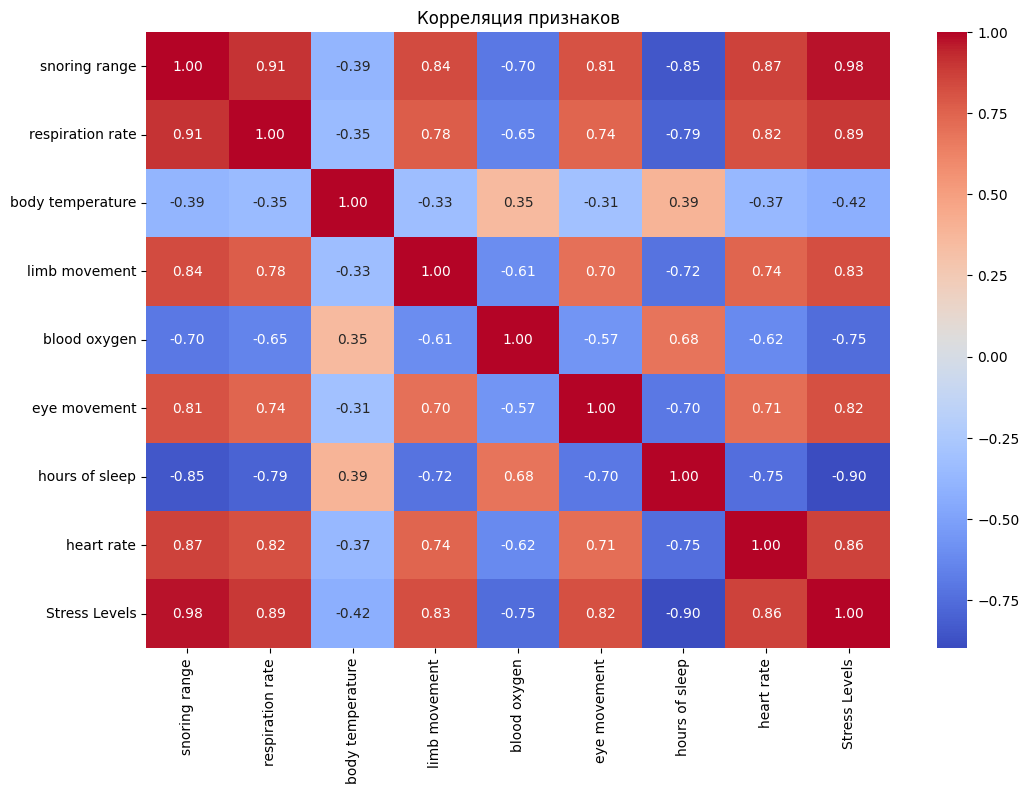

Корреляция с Stress Levels:
Stress Levels       1.000000
snoring range       0.975322
respiration rate    0.893639
heart rate          0.860252
limb movement       0.829520
eye movement        0.815384
body temperature   -0.423766
blood oxygen       -0.752258
hours of sleep     -0.897514
Name: Stress Levels, dtype: float64


In [123]:
# Корреляционная матрица
correlation_matrix = data.corr()

# Тепловая карта корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция признаков")
plt.show()

# Корреляция с PSS_score
print("Корреляция с Stress Levels:")
print(correlation_matrix['Stress Levels'].sort_values(ascending=False))

Для этих признаков наибольшая корреляция с snoring range:

body temperature: -0.39 snoring range (0.39 для hours of sleep),

blood oxygen: -0.70 snoring range,

hours of sleep: -0.85 snoring range.

Для восстановления ошибочных значений возьмём данные по snoring range.

In [97]:
data[data['snoring range'] == 96.288]

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
13,96.288000,26.288000,85.360000,17.144000,82.432000,100.360000,0.000000,75.720000,4


Очевидно, что точных совпадений может не быть. Попробуем найти подобные.

In [124]:
# Исключаем строки из zero_sleep_rows и удаляем NaN
filtered_data = data.drop(index=zero_sleep_rows.index).dropna()

for index, row in zero_sleep_rows.iterrows():
    snoring_value = row['snoring range']
    
    # Ищем ближайшее значение среди оставшихся данных
    match = filtered_data.iloc[(filtered_data['snoring range'] - snoring_value).abs().argsort()[:1]]

    if not match.empty:
        print(f"Для строки {index} (snoring range = {snoring_value}) найдено соответствие:")
        print(match)
    else:
        print(f"Для строки {index} (snoring range = {snoring_value}) нет близкого соответствия.")

Для строки 13 (snoring range = 96.288) найдено соответствие:
     snoring range  respiration rate  body temperature  limb movement  \
316      95.000000         26.000000         92.000000      17.000000   

     blood oxygen  eye movement  hours of sleep  heart rate  Stress Levels  
316     90.000000    100.000000        2.000000   75.000000              3  
Для строки 31 (snoring range = 96.256) найдено соответствие:
     snoring range  respiration rate  body temperature  limb movement  \
316      95.000000         26.000000         92.000000      17.000000   

     blood oxygen  eye movement  hours of sleep  heart rate  Stress Levels  
316     90.000000    100.000000        2.000000   75.000000              3  
Для строки 33 (snoring range = 99.904) найдено соответствие:
     snoring range  respiration rate  body temperature  limb movement  \
316      95.000000         26.000000         92.000000      17.000000   

     blood oxygen  eye movement  hours of sleep  heart rate  Stress 

Для строки 620 (snoring range = 97.024) найдено соответствие:
     snoring range  respiration rate  body temperature  limb movement  \
316      95.000000         26.000000         92.000000      17.000000   

     blood oxygen  eye movement  hours of sleep  heart rate  Stress Levels  
316     90.000000    100.000000        2.000000   75.000000              3  
Для строки 623 (snoring range = 98.144) найдено соответствие:
     snoring range  respiration rate  body temperature  limb movement  \
316      95.000000         26.000000         92.000000      17.000000   

     blood oxygen  eye movement  hours of sleep  heart rate  Stress Levels  
316     90.000000    100.000000        2.000000   75.000000              3  
Для строки 627 (snoring range = 97.504) найдено соответствие:
     snoring range  respiration rate  body temperature  limb movement  \
316      95.000000         26.000000         92.000000      17.000000   

     blood oxygen  eye movement  hours of sleep  heart rate  Stre

Найдено только одно подходящее значение для hours of sleep = 2.0. Использовать одно значение для целого класса нецелесообразно. Так как Stress Levels подходящего значения = 3, то можно принять его как максимальное (с учётом имеющейся заисисмости hours of sleep и Stress Levels.

Далее использованы данные, полученные Сашей с помощью XGBRegressor и RandomForestRegressor, а также усреднения std для hours of sleep 0, 1, 2, 3 уровней стресса.

Восстановим данные с помщью усечённого нормального распределения.

Сгенерированное среднее: 0.7424, медиана: 0.6689, std: 0.4679


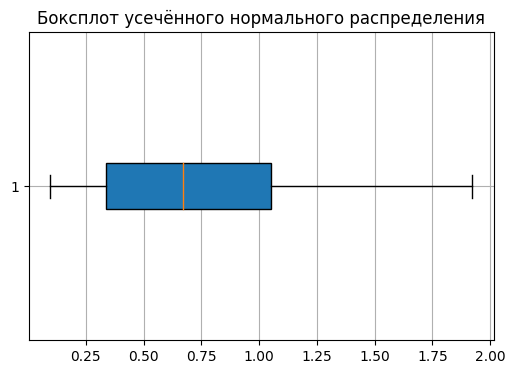

In [120]:
# Исходные параметры
median_v = 0.74
std_v = 0.645

# Определяем границы обрезки
#(от 0.083 (минимальная продолжительность короткого сна) до 2.0 (значение, найденное по соответствию))
lower, upper = 0.083, 2.0

#подбираем корректное среднее (μ)

tol = 1e-5  # Точность
mu_guess = median_v  # Начальное приближение, приблизительно берем mu_guess = median_v (то есть 0.74)
diff = 1  

#из-за усечения распределение не симметрично, и его медиана смещается, поэтому нужно скорректировать μ:
while abs(diff) > tol: # Вычисляем текущую медиану trunc_median на основе mu_guess
    trunc_median = stats.truncnorm.median( 
        (lower - mu_guess) / std_v, (upper - mu_guess) / std_v, loc=mu_guess, scale=std_v
    )
    diff = median_v - trunc_median #если она отличается от median_v, двигаем mu_guess в нужную сторону
    mu_guess += diff * 0.1  # двигаем `μ` в нужную сторону

mu_corrected = mu_guess

# Генерация распределения
a, b = (lower - mu_corrected) / std_v, (upper - mu_corrected) / std_v
samples = stats.truncnorm.rvs(a, b, loc=mu_corrected, scale=std_v, size=126)

# Статистики
print(f"Сгенерированное среднее: {np.mean(samples):.4f}, медиана: {np.median(samples):.4f}, std: {np.std(samples):.4f}")

# Боксплот
plt.figure(figsize=(6, 4))
plt.boxplot(samples, vert=False, patch_artist=True)
plt.title("Боксплот усечённого нормального распределения")
plt.grid()
plt.show()

In [121]:
samples

array([0.22095119, 1.42467959, 1.17838512, 0.53629787, 0.41588499,
       0.21662481, 0.36157544, 1.11079287, 0.56328764, 1.13558389,
       0.17883686, 0.71252878, 0.21773327, 0.45259597, 1.64081375,
       0.50744494, 0.30618533, 1.28624976, 0.77435091, 0.21766642,
       0.97612676, 0.1506851 , 1.51834682, 1.20934408, 0.33573183,
       0.49840833, 0.66091399, 0.27136386, 1.00769613, 0.0982299 ,
       0.26091385, 0.98435885, 0.67682478, 0.25973935, 1.80488494,
       0.26261498, 0.83979635, 0.29778106, 1.02582309, 1.33050589,
       1.92370663, 1.5095011 , 1.47957437, 1.76180386, 0.17178979,
       0.87374324, 0.1005582 , 0.09358958, 1.51441437, 0.68744761,
       1.49211211, 0.46214268, 0.307304  , 1.441733  , 0.63845584,
       0.41088096, 0.94010345, 0.7562539 , 1.05965903, 0.09497587,
       0.35181364, 0.96323548, 0.45486601, 0.09941434, 0.89840766,
       0.10779235, 0.34149373, 0.77966558, 1.00838373, 1.14575804,
       0.72950951, 0.14296975, 1.44657483, 1.8501583 , 1.13000

Так как корреляция между snoring range и hours of sleep обратная, отсортируем значения для одного признака в порядке убывания, а для второго в порядке возрастания 

In [126]:
# Сортируем zero_sleep_rows по snoring range (по убыванию)
zero_sleep_rows_sorted = zero_sleep_rows.sort_values(by='snoring range', ascending=False)

# Сортируем samples по возрастанию
samples_sorted = np.sort(samples)

# Записываем отсортированные samples в колонку "hours of sleep"
zero_sleep_rows_sorted.loc[:, 'hours of sleep'] = samples_sorted

data_nozero = data.copy()

# Обновляем наш датасет
data_nozero.loc[zero_sleep_rows_sorted.index, 'hours of sleep'] = zero_sleep_rows_sorted['hours of sleep']

In [127]:
zero_sleep_rows_sorted

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
169,100.000000,30.000000,90.000000,19.000000,88.000000,105.000000,0.093590,85.000000,4
390,99.968000,29.968000,89.960000,18.984000,87.952000,104.960000,0.094976,84.920000,4
351,99.936000,29.936000,89.920000,18.968000,87.904000,104.920000,0.098230,84.840000,4
33,99.904000,29.904000,89.880000,18.952000,87.856000,104.880000,0.099414,84.760000,4
260,99.872000,29.872000,89.840000,18.936000,87.808000,104.840000,0.100558,84.680000,4
570,99.840000,29.840000,89.800000,18.920000,87.760000,104.800000,0.107792,84.600000,4
93,99.808000,29.808000,89.760000,18.904000,87.712000,104.760000,0.142970,84.520000,4
168,99.776000,29.776000,89.720000,18.888000,87.664000,104.720000,0.150685,84.440000,4
428,99.744000,29.744000,89.680000,18.872000,87.616000,104.680000,0.168014,84.360000,4
462,99.712000,29.712000,89.640000,18.856000,87.568000,104.640000,0.171790,84.280000,4


In [128]:
samples_sorted

array([0.09358958, 0.09497587, 0.0982299 , 0.09941434, 0.1005582 ,
       0.10779235, 0.14296975, 0.1506851 , 0.16801371, 0.17178979,
       0.17222359, 0.17883686, 0.18394288, 0.20700809, 0.21662481,
       0.21766642, 0.21773327, 0.22095119, 0.22971923, 0.24749514,
       0.25973935, 0.26091385, 0.26261498, 0.27136386, 0.28718855,
       0.29778106, 0.29791485, 0.30618533, 0.307304  , 0.32074448,
       0.32650881, 0.33573183, 0.34130895, 0.34149373, 0.35181364,
       0.35519734, 0.36157544, 0.39413715, 0.40636859, 0.41088096,
       0.41588499, 0.4239269 , 0.45259597, 0.45486601, 0.46214268,
       0.46463521, 0.4916193 , 0.49840833, 0.50744494, 0.51170456,
       0.51808444, 0.51950468, 0.53155626, 0.53629787, 0.56248908,
       0.56328764, 0.5754757 , 0.58869724, 0.59333455, 0.61542727,
       0.63845584, 0.65257436, 0.66091399, 0.67682478, 0.68744761,
       0.6962042 , 0.71252878, 0.72950951, 0.7562539 , 0.75940863,
       0.76913183, 0.77435091, 0.77966558, 0.79327048, 0.80136

In [129]:
data_nozero

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.800000,25.680000,91.840000,16.600000,89.840000,99.600000,1.840000,74.200000,3
1,91.640000,25.104000,91.552000,15.880000,89.552000,98.880000,1.552000,72.760000,3
2,60.000000,20.000000,96.000000,10.000000,95.000000,85.000000,7.000000,60.000000,1
3,85.760000,23.536000,90.768000,13.920000,88.768000,96.920000,0.768000,68.840000,3
4,48.120000,17.248000,97.872000,6.496000,96.248000,72.480000,8.248000,53.120000,0
5,56.880000,19.376000,95.376000,9.376000,94.064000,83.440000,6.376000,58.440000,1
6,47.000000,16.800000,97.200000,5.600000,95.800000,68.000000,7.800000,52.000000,0
7,50.000000,18.000000,99.000000,8.000000,97.000000,80.000000,9.000000,55.000000,0
8,45.280000,16.112000,96.168000,4.224000,95.112000,61.120000,7.112000,50.280000,0
9,55.520000,19.104000,95.104000,9.104000,93.656000,82.760000,6.104000,57.760000,1


In [130]:
data_nozero.groupby('Stress Levels').describe().T

Stress Levels                   0          1          2          3          4
snoring range    count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   47.500000  55.000000  70.000000  87.500000  98.000000
                 std     1.460685   2.921370   5.842739   4.382054   1.168548
                 min    45.000000  50.000000  60.000000  80.000000  96.000000
                 25%    46.250000  52.500000  65.000000  83.750000  97.000000
                 50%    47.500000  55.000000  70.000000  87.500000  98.000000
                 75%    48.750000  57.500000  75.000000  91.250000  99.000000
                 max    50.000000  60.000000  80.000000  95.000000 100.000000
respiration rate count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   17.000000  19.000000  21.202698  24.378873  28.000000
                 std     0.584274   0.584274   2.345623   3.193225   1.168548
                 min    16.000000  18.000000  20.000000  22.000000  26.000000
                 25%    16.500000  18.500000  20.500000  23.032000  27.000000
                 50%    17.000000  19.000000  21.016000  24.032000  28.000000
                 75%    17.500000  19.500000  21.516000  25.032000  29.000000
                 max    18.000000  20.000000  46.500000  48.560000  30.000000
body temperature count 120.000000 124.000000 124.000000 123.000000 123.000000
                 mean   97.496400  95.471355  93.584952  91.843756  89.044797
                 std     0.880518   5.295376   6.602914   6.690573   8.627650
                 min    96.000000  94.000000  92.000000  90.000000  85.000000
                 25%    96.738000  94.492000  92.492000  90.520000  86.220000
                 50%    97.500000  95.000000  93.000000  91.024000  87.640000
                 75%    98.238000  95.524000  93.524000  91.512000  88.940000
                 max    99.000000 153.600000 166.230000 152.300000 141.650000
limb movement    count 125.000000 124.000000 123.000000 123.000000 123.000000
                 mean    6.355728   9.275565  11.164683  14.811789  18.230764
                 std     3.134605   3.076568   1.868061   2.899056   2.662427
                 min     4.000000   8.000000  10.000000  12.000000  17.000000
                 25%     5.056000   8.508000  10.504000  13.300000  17.488000
                 50%     6.048000   9.016000  11.024000  14.520000  18.008000
                 75%     7.040000   9.508000  11.512000  15.820000  18.512000
                 max    36.230000  42.650000  30.680000  38.460000  46.800000
blood oxygen     count 125.000000 125.000000 125.000000 125.000000 126.000000
                 mean   95.996480  93.488384  91.287504  89.515616  85.000000
                 std     0.585282   0.870145   3.417682   5.869922   1.752822
                 min    95.000000  92.000000  90.000000  88.000000  82.000000
                 25%    95.496000  92.744000  90.496000  88.496000  83.500000
                 50%    95.992000  93.488000  90.992000  89.008000  85.000000
                 75%    96.504000  94.232000  91.488000  89.504000  86.500000
                 max    97.000000  95.000000 128.650000 154.300000  88.000000
eye movement     count 123.000000 125.000000 120.000000 121.000000 123.000000
                 mean   69.943415  85.103200  89.996000  97.479339 102.527805
                 std     5.883723  14.860029   2.924840   1.458273   1.461126
                 min    60.000000  80.000000  85.000000  95.000000 100.000000
                 25%    64.880000  81.280000  87.540000  96.240000 101.260000
                 50%    69.920000  82.560000  89.920000  97.440000 102.560000
                 75%    74.960000  83.840000  92.540000  98.720000 103.780000
                 max    80.000000 185.360000  95.000000 100.000000 105.000000
hours of sleep   count 124.000000 125.000000 122.000000 123.000000 125.000000
                 mean    8.130226   6.003776   3.921115   1.132128   0.732987
                 std  

Для восстановления ошибочных значений body temperature и blood oxygen будем искать ближайших соседей по snoring range внутри класса.

In [131]:
def fill_outliers_knn_class(data, outliers_df, feature_col, ref_col, k=3):
    
    """
    Заменяет выбросы в колонке feature_col на значения, предсказанные KNN,
    используя ref_col как опорный признак.

    data: основной DataFrame
    outliers_df: DataFrame с выбросами (outliers_tmp)
    feature_col: колонка с ошибочными значениями
    ref_col: колонка, по которой ищем ближайших соседей внутри класса
    k: количество соседей для KNN
    """
    
    data_filled = data.copy()

    for stress_level in sorted(data['Stress Levels'].unique()):  
        # Фильтруем данные только внутри текущего уровня стресса
        stress_data = data[data['Stress Levels'] == stress_level]
        train_data = stress_data[~stress_data.index.isin(outliers_df.index)]
        train_data = train_data.dropna(subset=[feature_col, ref_col])

        if train_data.empty:
            print(f"Нет нормальных данных для {feature_col} при уровне стресса {stress_level}, пропускаем.")
            continue

        knn = KNeighborsRegressor(n_neighbors=min(k, len(train_data)))
        knn.fit(train_data[[ref_col]], train_data[feature_col])

        # Применяем KNN только к выбросам внутри текущего уровня стресса
        for idx in outliers_df[(outliers_df['Outlier Feature'] == feature_col) & 
                               (outliers_df['Stress Levels'] == stress_level)].index:
            if pd.notna(data_filled.loc[idx, ref_col]):  
                predicted_value = knn.predict([[data_filled.loc[idx, ref_col]]])
                data_filled.at[idx, feature_col] = predicted_value[0]

    return data_filled

# Заменяем ошибки в "body temperature", используя "snoring range" как опорный признак
data_corrected = fill_outliers_knn_class(data_nozero, outliers_tmp, 'body temperature', 'snoring range', k=3)

# Аналогично можно заменить "blood oxygen", выбрав наиболее коррелирующий признак
data_corrected = fill_outliers_knn_class(data_corrected, outliers_tmp, 'blood oxygen', 'snoring range', k=3)

C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning

In [132]:
data_corrected

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.800000,25.680000,91.840000,16.600000,89.840000,99.600000,1.840000,74.200000,3
1,91.640000,25.104000,91.552000,15.880000,89.552000,98.880000,1.552000,72.760000,3
2,60.000000,20.000000,96.000000,10.000000,95.000000,85.000000,7.000000,60.000000,1
3,85.760000,23.536000,90.768000,13.920000,88.768000,96.920000,0.768000,68.840000,3
4,48.120000,17.248000,97.872000,6.496000,96.248000,72.480000,8.248000,53.120000,0
5,56.880000,19.376000,95.376000,9.376000,94.064000,83.440000,6.376000,58.440000,1
6,47.000000,16.800000,97.200000,5.600000,95.800000,68.000000,7.800000,52.000000,0
7,50.000000,18.000000,99.000000,8.000000,97.000000,80.000000,9.000000,55.000000,0
8,45.280000,16.112000,96.168000,4.224000,95.112000,61.120000,7.112000,50.280000,0
9,55.520000,19.104000,95.104000,9.104000,93.656000,82.760000,6.104000,57.760000,1


In [134]:
data_corrected.groupby('Stress Levels').describe().T

Stress Levels                   0          1          2          3          4
snoring range    count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   47.500000  55.000000  70.000000  87.500000  98.000000
                 std     1.460685   2.921370   5.842739   4.382054   1.168548
                 min    45.000000  50.000000  60.000000  80.000000  96.000000
                 25%    46.250000  52.500000  65.000000  83.750000  97.000000
                 50%    47.500000  55.000000  70.000000  87.500000  98.000000
                 75%    48.750000  57.500000  75.000000  91.250000  99.000000
                 max    50.000000  60.000000  80.000000  95.000000 100.000000
respiration rate count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   17.000000  19.000000  21.202698  24.378873  28.000000
                 std     0.584274   0.584274   2.345623   3.193225   1.168548
                 min    16.000000  18.000000  20.000000  22.000000  26.000000
                 25%    16.500000  18.500000  20.500000  23.032000  27.000000
                 50%    17.000000  19.000000  21.016000  24.032000  28.000000
                 75%    17.500000  19.500000  21.516000  25.032000  29.000000
                 max    18.000000  20.000000  46.500000  48.560000  30.000000
body temperature count 120.000000 124.000000 124.000000 123.000000 123.000000
                 mean   97.496400  94.999914  92.997591  91.008260  87.509268
                 std     0.880518   0.588876   0.588264   0.574892   1.475391
                 min    96.000000  94.000000  92.000000  90.000000  85.000000
                 25%    96.738000  94.492000  92.492000  90.520000  86.220000
                 50%    97.500000  95.000000  93.000000  91.008000  87.520000
                 75%    98.238000  95.508000  93.508000  91.496000  88.766667
                 max    99.000000  96.000000  94.000000  92.000000  90.000000
limb movement    count 125.000000 124.000000 123.000000 123.000000 123.000000
                 mean    6.355728   9.275565  11.164683  14.811789  18.230764
                 std     3.134605   3.076568   1.868061   2.899056   2.662427
                 min     4.000000   8.000000  10.000000  12.000000  17.000000
                 25%     5.056000   8.508000  10.504000  13.300000  17.488000
                 50%     6.048000   9.016000  11.024000  14.520000  18.008000
                 75%     7.040000   9.508000  11.512000  15.820000  18.512000
                 max    36.230000  42.650000  30.680000  38.460000  46.800000
blood oxygen     count 125.000000 125.000000 125.000000 125.000000 126.000000
                 mean   95.996480  93.488384  90.993749  88.992213  85.000000
                 std     0.585282   0.870145   0.582400   0.579859   1.752822
                 min    95.000000  92.000000  90.000000  88.000000  82.000000
                 25%    95.496000  92.744000  90.496000  88.496000  83.500000
                 50%    95.992000  93.488000  90.992000  88.992000  85.000000
                 75%    96.504000  94.232000  91.488000  89.488000  86.500000
                 max    97.000000  95.000000  92.000000  90.000000  88.000000
eye movement     count 123.000000 125.000000 120.000000 121.000000 123.000000
                 mean   69.943415  85.103200  89.996000  97.479339 102.527805
                 std     5.883723  14.860029   2.924840   1.458273   1.461126
                 min    60.000000  80.000000  85.000000  95.000000 100.000000
                 25%    64.880000  81.280000  87.540000  96.240000 101.260000
                 50%    69.920000  82.560000  89.920000  97.440000 102.560000
                 75%    74.960000  83.840000  92.540000  98.720000 103.780000
                 max    80.000000 185.360000  95.000000 100.000000 105.000000
hours of sleep   count 124.000000 125.000000 122.000000 123.000000 125.000000
                 mean    8.130226   6.003776   3.921115   1.132128   0.732987
                 std  

In [135]:
data_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring range     630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  614 non-null    float64
 3   limb movement     618 non-null    float64
 4   blood oxygen      626 non-null    float64
 5   eye movement      612 non-null    float64
 6   hours of sleep    619 non-null    float64
 7   heart rate        606 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [136]:
data_corrected.describe()

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
count,630.000000,630.000000,614.000000,618.000000,626.000000,612.000000,619.000000,606.000000,630.000000
mean,71.600000,21.916314,92.783249,11.945188,90.884750,88.964673,3.986868,64.901733,2.000000
std,19.372833,4.336242,3.514769,5.001250,3.904943,13.480426,3.183912,11.260908,1.415337
min,45.000000,16.000000,85.000000,4.000000,82.000000,60.000000,0.016000,50.000000,0.000000
25%,52.500000,18.500000,90.516000,8.516000,88.484000,81.230000,1.024912,56.210000,1.000000
50%,70.000000,21.016000,92.976000,11.048000,90.984000,90.080000,3.608000,62.540000,2.000000
75%,91.250000,25.064000,95.468000,15.950000,94.226000,98.890000,6.592000,72.740000,3.000000
max,100.000000,48.560000,99.000000,46.800000,97.000000,185.360000,20.220000,158.650000,4.000000


In [ ]:
Диапазоны значений после обработки ошибок:

snoring range: 45.0-100.0 dB

respiration rate: 16.0-48.56 bpm

body temperature: (80.6) 85.0-99.0 (115.7) °F

limb movement: 4.0-46.8 movements per hour

blood oxygen: 82.0-97.0 (100.0)%

eye movement: 60.0-185.36 movements per hour

hours of sleep: 0.016-20.22 hours

heart rate: 50.0-158.65 bpm

Stress Levels: 0, 1, 2, 3, 4

Теперь пропуски:

In [137]:
# Вывод строк с пропусками
rows_with_missing = data_corrected[data_corrected.isnull().any(axis=1)]

print(rows_with_missing)

     snoring range  respiration rate  body temperature  limb movement  \
12       48.600000         17.440000         98.160000       6.880000   
16       52.640000         18.528000         94.528000       8.528000   
18       81.560000         22.416000         90.208000      12.520000   
19       63.680000         20.368000         92.368000            NaN   
20       77.600000         21.760000         93.760000      11.760000   
22       69.760000         20.976000               NaN      10.976000   
24       89.960000         24.656000         91.328000            NaN   
31       96.256000         26.256000         85.320000      17.128000   
34       60.000000         20.000000         92.000000      10.000000   
41       65.600000         20.560000         92.560000            NaN   
44       73.280000         21.328000         93.328000      11.328000   
59       58.480000         19.696000         95.696000       9.696000   
61       81.080000         22.288000         90.144

In [138]:
# Вывод строк с более чем одним пропуском
rows_with_multiple_missing = data_corrected[data_corrected.isnull().sum(axis=1) > 1]

print(rows_with_multiple_missing)

    snoring range  respiration rate  body temperature  limb movement  \
24      89.960000         24.656000         91.328000            NaN   

    blood oxygen  eye movement  hours of sleep  heart rate  Stress Levels  
24     89.328000           NaN        1.328000   71.640000              3  


Только одна строка где более олного пропуска, т.е. остальные 83 строки с пропуском одного из значений:

body temperature  16

limb movement     11

blood oxygen      4

eye movement      17

hours of sleep    11

heart rate        24

Поскольку все показатели получены в результате инструментальных замеров, вероятнее всего причина пропусков техническая, также возможен человеческий фактор (случайный пропуск при заполнении)

In [139]:
# Подсчет процента пропусков для каждого признака
missing_perc = data_corrected.isnull().mean() * 100

print(missing_perc)

snoring range      0.000000
respiration rate   0.000000
body temperature   2.539683
limb movement      1.904762
blood oxygen       0.634921
eye movement       2.857143
hours of sleep     1.746032
heart rate         3.809524
Stress Levels      0.000000
dtype: float64


Для каждого из признаков процент пропуска небольшой, но поскольку практически все из них в отдельных строках - суммарно получается более 13% с пропущенными значениями, поэтому удаление наблюдений с пропусками нежелательно. Будем заполнять пропуски. Проверим как распределены пропущенные значения в датасете, для каких уровней стресса встречаются.

In [140]:
# Фильтруем строки, где есть хотя бы один пропуск
missing_values_df = data_corrected[data_corrected.isnull().any(axis=1)].copy()

# Определяем признак с пропуском для каждой строки
missing_values_df["Missing Feature"] = missing_values_df.apply(lambda row: [col for col in data_corrected.columns if pd.isnull(row[col])], axis=1)

# Разворачиваем список пропущенных признаков в строки (каждая строка будет с одним конкретным NaN-признаком)
missing_values_df = missing_values_df.explode("Missing Feature")

In [56]:
missing_values_df

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels,Missing Feature
12,48.600,17.440,98.160000,6.880,NaN,74.40,8.440,53.60,0,blood oxygen
16,52.640,18.528,94.528000,8.528,92.792,81.32,NaN,56.32,1,hours of sleep
18,81.560,22.416,90.208000,12.520,88.208,95.52,0.208,NaN,3,heart rate
19,63.680,20.368,92.368000,NaN,90.368,86.84,2.552,60.92,2,limb movement
20,77.600,21.760,93.760000,11.760,91.760,NaN,4.640,64.40,2,eye movement
22,69.760,20.976,NaN,10.976,90.976,89.88,3.464,62.44,2,body temperature
24,89.960,24.656,91.328000,NaN,89.328,NaN,1.328,71.64,3,limb movement
24,89.960,24.656,91.328000,NaN,89.328,NaN,1.328,71.64,3,eye movement
31,96.256,26.256,85.320000,17.128,82.384,NaN,1.984,75.64,4,eye movement
34,60.000,20.000,92.000000,10.000,90.000,85.00,2.000,NaN,2,heart rate


Пропуски есть для всех классов, "разбросаны" по всему датасету.Посмотрим на статистики для каждого уровня стресса.

In [142]:
data_corrected.groupby('Stress Levels').describe().T

Stress Levels                   0          1          2          3          4
snoring range    count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   47.500000  55.000000  70.000000  87.500000  98.000000
                 std     1.460685   2.921370   5.842739   4.382054   1.168548
                 min    45.000000  50.000000  60.000000  80.000000  96.000000
                 25%    46.250000  52.500000  65.000000  83.750000  97.000000
                 50%    47.500000  55.000000  70.000000  87.500000  98.000000
                 75%    48.750000  57.500000  75.000000  91.250000  99.000000
                 max    50.000000  60.000000  80.000000  95.000000 100.000000
respiration rate count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   17.000000  19.000000  21.202698  24.378873  28.000000
                 std     0.584274   0.584274   2.345623   3.193225   1.168548
                 min    16.000000  18.000000  20.000000  22.000000  26.000000
                 25%    16.500000  18.500000  20.500000  23.032000  27.000000
                 50%    17.000000  19.000000  21.016000  24.032000  28.000000
                 75%    17.500000  19.500000  21.516000  25.032000  29.000000
                 max    18.000000  20.000000  46.500000  48.560000  30.000000
body temperature count 120.000000 124.000000 124.000000 123.000000 123.000000
                 mean   97.496400  94.999914  92.997591  91.008260  87.509268
                 std     0.880518   0.588876   0.588264   0.574892   1.475391
                 min    96.000000  94.000000  92.000000  90.000000  85.000000
                 25%    96.738000  94.492000  92.492000  90.520000  86.220000
                 50%    97.500000  95.000000  93.000000  91.008000  87.520000
                 75%    98.238000  95.508000  93.508000  91.496000  88.766667
                 max    99.000000  96.000000  94.000000  92.000000  90.000000
limb movement    count 125.000000 124.000000 123.000000 123.000000 123.000000
                 mean    6.355728   9.275565  11.164683  14.811789  18.230764
                 std     3.134605   3.076568   1.868061   2.899056   2.662427
                 min     4.000000   8.000000  10.000000  12.000000  17.000000
                 25%     5.056000   8.508000  10.504000  13.300000  17.488000
                 50%     6.048000   9.016000  11.024000  14.520000  18.008000
                 75%     7.040000   9.508000  11.512000  15.820000  18.512000
                 max    36.230000  42.650000  30.680000  38.460000  46.800000
blood oxygen     count 125.000000 125.000000 125.000000 125.000000 126.000000
                 mean   95.996480  93.488384  90.993749  88.992213  85.000000
                 std     0.585282   0.870145   0.582400   0.579859   1.752822
                 min    95.000000  92.000000  90.000000  88.000000  82.000000
                 25%    95.496000  92.744000  90.496000  88.496000  83.500000
                 50%    95.992000  93.488000  90.992000  88.992000  85.000000
                 75%    96.504000  94.232000  91.488000  89.488000  86.500000
                 max    97.000000  95.000000  92.000000  90.000000  88.000000
eye movement     count 123.000000 125.000000 120.000000 121.000000 123.000000
                 mean   69.943415  85.103200  89.996000  97.479339 102.527805
                 std     5.883723  14.860029   2.924840   1.458273   1.461126
                 min    60.000000  80.000000  85.000000  95.000000 100.000000
                 25%    64.880000  81.280000  87.540000  96.240000 101.260000
                 50%    69.920000  82.560000  89.920000  97.440000 102.560000
                 75%    74.960000  83.840000  92.540000  98.720000 103.780000
                 max    80.000000 185.360000  95.000000 100.000000 105.000000
hours of sleep   count 124.000000 125.000000 122.000000 123.000000 125.000000
                 mean    8.130226   6.003776   3.921115   1.132128   0.732987
                 std  

Интервалы значений признаков для каждого уровня стресса неравномерные. Всегда ли будет корректно заменять, например, медианой. Медиана не сместит распределение в целом, но при этом может нарушить внутренние закономерности данных. Это может отразиться на предсказательной способности модели.
Проверим с каким признаком наибольшая корреляция.

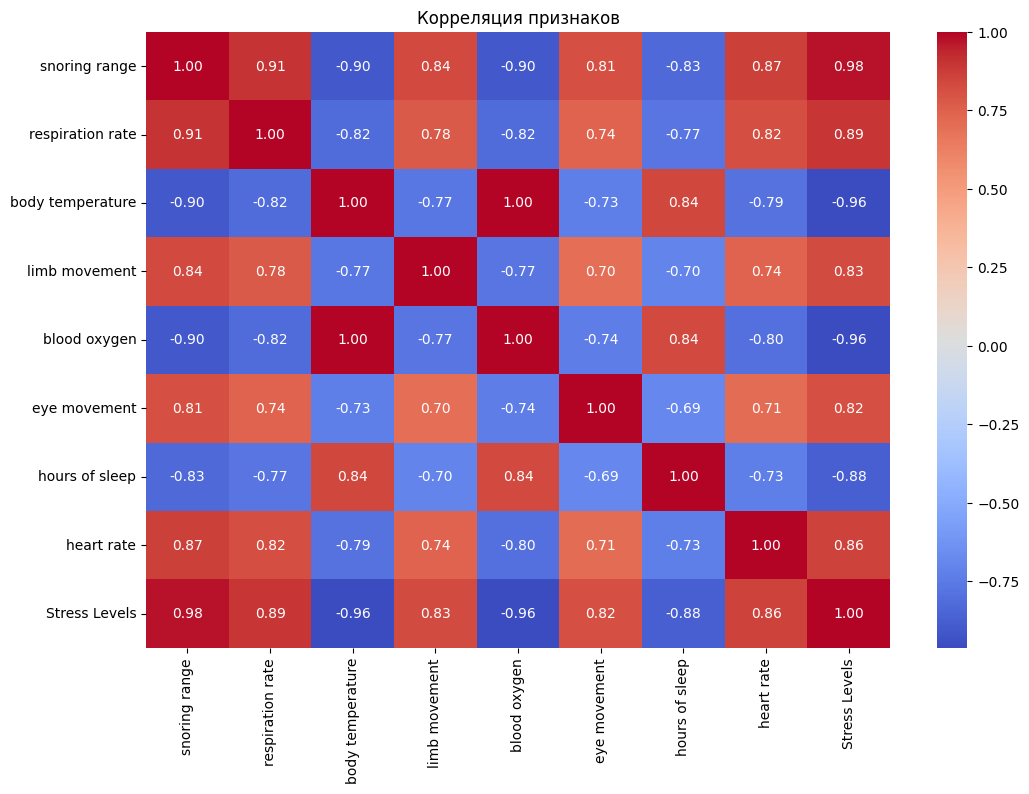

Корреляция с Stress Levels:
Stress Levels       1.000000
snoring range       0.975322
respiration rate    0.893639
heart rate          0.860252
limb movement       0.829520
eye movement        0.815384
hours of sleep     -0.875555
blood oxygen       -0.961206
body temperature   -0.961658
Name: Stress Levels, dtype: float64


In [143]:
# Корреляционная матрица
correlation_matrix = data_corrected.corr()

# Тепловая карта корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция признаков")
plt.show()

# Корреляция с PSS_score
print("Корреляция с Stress Levels:")
print(correlation_matrix['Stress Levels'].sort_values(ascending=False))

Наибольшая корреляция для признаков с пропусками прослеживается с respiration rate (кроме limb movement и eye movement). limb movement и eye movement больше коррелируют с hours of sleep, который в свою очередь более всего коррелирует с respiration rate.

body temperature: -0.90 snoring range,

limb movement: 0.84 snoring range,

blood oxygen: -0.90 snoring range,

eye movement: 0.81 snoring range,

hours of sleep: 0.88 body temperature (blood oxygen),

heart rate: 0.81 snoring range.

Заменим по аналогии с ошибочными значениями по ближайшим соседям внутри класса.

In [144]:
def fill_missing_knn(data, missing_df, feature_col, ref_col, k=3):
    """
    Заменяет пропуски в колонке feature_col на значения, предсказанные KNN,
    используя ref_col как опорный признак.
    """
    data_filled = data.copy()
    train_data = data.dropna(subset=[feature_col, ref_col])  # Удаляем NaN перед обучением

    if train_data.empty:
        print(f"Нет данных для {feature_col}, пропускаем заполнение.")
        return data_filled

    knn = KNeighborsRegressor(n_neighbors=min(k, len(train_data)))  
    knn.fit(train_data[[ref_col]], train_data[feature_col])

    for idx in missing_df[missing_df["Missing Feature"] == feature_col].index:
        if pd.notna(data_filled.loc[idx, ref_col]):  # Проверяем, что референтный признак не NaN
            predicted_value = knn.predict([[data_filled.loc[idx, ref_col]]])
            data_filled.at[idx, feature_col] = predicted_value[0]

    return data_filled

# Заполняем пропуски по ближайшим соседям
data_filled = fill_missing_knn(data_corrected, missing_values_df, 'body temperature', 'snoring range', k=3)
data_filled = fill_missing_knn(data_filled, missing_values_df, 'limb movement', 'snoring range', k=3)
data_filled = fill_missing_knn(data_filled, missing_values_df, 'blood oxygen', 'snoring range', k=3)
data_filled = fill_missing_knn(data_filled, missing_values_df, 'eye movement', 'snoring range', k=3)
data_filled = fill_missing_knn(data_filled, missing_values_df, 'hours of sleep', 'blood oxygen', k=3)
data_filled = fill_missing_knn(data_filled, missing_values_df, 'heart rate', 'snoring range', k=3)

C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ela96\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning

In [145]:
data_filled

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.800000,25.680000,91.840000,16.600000,89.840000,99.600000,1.840000,74.200000,3
1,91.640000,25.104000,91.552000,15.880000,89.552000,98.880000,1.552000,72.760000,3
2,60.000000,20.000000,96.000000,10.000000,95.000000,85.000000,7.000000,60.000000,1
3,85.760000,23.536000,90.768000,13.920000,88.768000,96.920000,0.768000,68.840000,3
4,48.120000,17.248000,97.872000,6.496000,96.248000,72.480000,8.248000,53.120000,0
5,56.880000,19.376000,95.376000,9.376000,94.064000,83.440000,6.376000,58.440000,1
6,47.000000,16.800000,97.200000,5.600000,95.800000,68.000000,7.800000,52.000000,0
7,50.000000,18.000000,99.000000,8.000000,97.000000,80.000000,9.000000,55.000000,0
8,45.280000,16.112000,96.168000,4.224000,95.112000,61.120000,7.112000,50.280000,0
9,55.520000,19.104000,95.104000,9.104000,93.656000,82.760000,6.104000,57.760000,1


In [146]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring range     630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  630 non-null    float64
 3   limb movement     630 non-null    float64
 4   blood oxygen      630 non-null    float64
 5   eye movement      630 non-null    float64
 6   hours of sleep    630 non-null    float64
 7   heart rate        630 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [147]:
data_filled.groupby('Stress Levels').describe().T

Stress Levels                   0          1          2          3          4
snoring range    count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   47.500000  55.000000  70.000000  87.500000  98.000000
                 std     1.460685   2.921370   5.842739   4.382054   1.168548
                 min    45.000000  50.000000  60.000000  80.000000  96.000000
                 25%    46.250000  52.500000  65.000000  83.750000  97.000000
                 50%    47.500000  55.000000  70.000000  87.500000  98.000000
                 75%    48.750000  57.500000  75.000000  91.250000  99.000000
                 max    50.000000  60.000000  80.000000  95.000000 100.000000
respiration rate count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   17.000000  19.000000  21.202698  24.378873  28.000000
                 std     0.584274   0.584274   2.345623   3.193225   1.168548
                 min    16.000000  18.000000  20.000000  22.000000  26.000000
                 25%    16.500000  18.500000  20.500000  23.032000  27.000000
                 50%    17.000000  19.000000  21.016000  24.032000  28.000000
                 75%    17.500000  19.500000  21.516000  25.032000  29.000000
                 max    18.000000  20.000000  46.500000  48.560000  30.000000
body temperature count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   97.499238  94.999915  93.000085  91.000212  87.499859
                 std     0.876354   0.584228   0.584259   0.584397   1.460697
                 min    96.000000  94.000000  92.000000  90.000000  85.000000
                 25%    96.750000  94.500000  92.500000  90.500000  86.250000
                 50%    97.500000  95.000000  93.000000  91.000000  87.500000
                 75%    98.250000  95.500000  93.500000  91.500000  88.730000
                 max    99.000000  96.000000  94.000000  92.000000  90.000000
limb movement    count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean    6.362090   9.274661  11.151725  14.801984  18.228974
                 std     3.122858   3.052372   1.847737   2.873736   2.631397
                 min     4.000000   8.000000  10.000000  12.000000  17.000000
                 25%     5.064000   8.516000  10.500000  13.290000  17.500000
                 50%     6.064000   9.016000  11.000000  14.540000  18.016000
                 75%     7.064000   9.516000  11.500000  15.790000  18.516000
                 max    36.230000  42.650000  30.680000  38.460000  46.800000
blood oxygen     count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   95.999915  93.500127  91.000169  89.000000  85.000000
                 std     0.584210   0.876624   0.584525   0.584112   1.752822
                 min    95.000000  92.000000  90.000000  88.000000  82.000000
                 25%    95.500000  92.750000  90.500000  88.500000  83.500000
                 50%    96.000000  93.500000  91.000000  89.000000  85.000000
                 75%    96.500000  94.250000  91.500000  89.500000  86.500000
                 max    97.000000  95.000000  92.000000  90.000000  88.000000
eye movement     count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean   70.000847  85.086085  90.000847  97.499788 102.499788
                 std     5.843195  14.801717   2.919733   1.460937   1.460553
                 min    60.000000  80.000000  85.000000  95.000000 100.000000
                 25%    65.000000  81.290000  87.500000  96.250000 101.250000
                 50%    70.000000  82.580000  90.000000  97.500000 102.500000
                 75%    75.000000  83.830000  92.500000  98.750000 103.750000
                 max    80.000000 185.360000  95.000000 100.000000 105.000000
hours of sleep   count 126.000000 126.000000 126.000000 126.000000 126.000000
                 mean    8.131926   5.999915   3.908063   1.133109   0.732985
                 std  

In [ ]:
respiration rate: [16.     18.     20.     22.0128 26.0704 48.56  ]
body temperature: [ 85.      90.0576  92.0832  94.0768  96.1056 166.23  ]
limb movement: [ 4.      8.0064 10.0128 12.088  17.0736 46.8   ]
blood oxygen: [ 82.     88.     90.     92.024  95.016 154.3  ]
eye movement: [ 60.     80.     85.032  95.104 100.152 185.36 ]
hours of sleep: [ 0.      2.0048  5.0928  7.0704 20.22  ]
heart rate: [ 50.    55.    60.    65.16  75.16 158.65]

In [165]:
data_nozero.to_csv("data_nozero.csv", index=False)

In [166]:
data_corrected.to_csv("data_corrected.csv", index=False)

In [167]:
data_filled.to_csv("data_filled.csv", index=False)

Сделаем сводную таблицу для трёх вариантов датасетов, чтобы удобнее было оценить разницу.

In [149]:
# Функция для извлечения нужных статистик
def get_stats(df, dataset_name):
    # Группируем по 'Stress Levels' и получаем описательные статистики
    stats = df.groupby('Stress Levels').describe().T
    
    # Извлекаем min, max, mean, 50% (медиану)
    selected_stats = stats.loc[(slice(None), ['min', 'max', 'mean', '50%']), :]
    
    # Переименовываем колонки в формат "датасет+уровень стресса"
    selected_stats.columns = [f"{dataset_name}_{col}" for col in selected_stats.columns]
    
    return selected_stats

# Получаем статистики для каждого датасета
stats_original = get_stats(data, 'data')
stats_corrected = get_stats(data_corrected, 'data_corrected')
stats_filled = get_stats(data_filled, 'data_filled')

# Объединяем все статистики в одну таблицу по столбцам
combined_stats = pd.concat([stats_original, stats_corrected, stats_filled], axis=1)

# Сбрасываем мультииндекс в строках, чтобы получить колонку с признаками и статистиками
combined_stats = combined_stats.reset_index()

# Переименовываем колонки
combined_stats.columns = ['Feature', 'Statistic'] + list(combined_stats.columns[2:])

# Упорядочиваем колонки: сначала все 0 уровни, потом 1 уровни и т.д.
ordered_columns = ['Feature', 'Statistic']
for stress_level in sorted(data['Stress Levels'].unique()):
    for dataset in ['data', 'data_corrected', 'data_filled']:
        ordered_columns.append(f"{dataset}_{stress_level}")

combined_stats = combined_stats[ordered_columns]

In [151]:
combined_stats

,Feature,Statistic,data_0,data_corrected_0,data_filled_0,data_1,data_corrected_1,data_filled_1,data_2,data_corrected_2,data_filled_2,data_3,data_corrected_3,data_filled_3,data_4,data_corrected_4,data_filled_4
0,snoring range,min,45.000000,45.000000,45.000000,50.000000,50.000000,50.000000,60.000000,60.000000,60.000000,80.000000,80.000000,80.000000,96.000000,96.000000,96.000000
1,respiration rate,min,16.000000,16.000000,16.000000,18.000000,18.000000,18.000000,20.000000,20.000000,20.000000,22.000000,22.000000,22.000000,26.000000,26.000000,26.000000
2,body temperature,min,96.000000,96.000000,96.000000,94.000000,94.000000,94.000000,92.000000,92.000000,92.000000,90.000000,90.000000,90.000000,85.000000,85.000000,85.000000
3,limb movement,min,4.000000,4.000000,4.000000,8.000000,8.000000,8.000000,10.000000,10.000000,10.000000,12.000000,12.000000,12.000000,17.000000,17.000000,17.000000
4,blood oxygen,min,95.000000,95.000000,95.000000,92.000000,92.000000,92.000000,90.000000,90.000000,90.000000,88.000000,88.000000,88.000000,82.000000,82.000000,82.000000
5,eye movement,min,60.000000,60.000000,60.000000,80.000000,80.000000,80.000000,85.000000,85.000000,85.000000,95.000000,95.000000,95.000000,100.000000,100.000000,100.000000
6,hours of sleep,min,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,2.000000,2.000000,2.000000,0.000000,0.016000,0.016000,0.000000,0.093590,0.093590
7,heart rate,min,50.000000,50.000000,50.000000,55.000000,55.000000,55.000000,60.040000,60.040000,59.960000,65.000000,65.000000,65.000000,75.000000,75.000000,75.000000
8,snoring range,max,50.000000,50.000000,50.000000,60.000000,60.000000,60.000000,80.000000,80.000000,80.000000,95.000000,95.000000,95.000000,100.000000,100.000000,100.000000
9,respiration rate,max,18.000000,18.000000,18.000000,20.000000,20.000000,20.000000,46.500000,46.500000,46.500000,48.560000,48.560000,48.560000,30.000000,30.000000,30.000000


Таблица получается громоздкая, всё ещё неудобно сравнивать. Отфильтруем только те строки, где есть различия.

In [152]:
# Создаем пустой DataFrame для хранения строк с различиями
differences = pd.DataFrame(columns=combined_stats.columns)

# Проходим по каждой строке в combined_stats
for idx, row in combined_stats.iterrows():
    # Сравниваем значения для каждого уровня стресса
    has_difference = False
    for stress_level in sorted(data['Stress Levels'].unique()):
        # Получаем значения для текущего уровня стресса
        values = [
            row[f"data_{stress_level}"],
            row[f"data_corrected_{stress_level}"],
            row[f"data_filled_{stress_level}"]
        ]
        
        # Если значения не совпадают, отмечаем это
        if len(set(values)) > 1:
            has_difference = True
            break
    
    # Если найдены различия, добавляем строку в результирующую таблицу
    if has_difference:
        differences = pd.concat([differences, row.to_frame().T], ignore_index=True)

In [153]:
differences.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Feature,hours of sleep,heart rate,body temperature,blood oxygen,hours of sleep,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate
Statistic,min,min,max,max,max,mean,mean,mean,mean,mean,mean,50%,50%,50%,50%,50%,50%
data_0,7.000000,50.000000,99.000000,97.000000,18.600000,97.496400,6.355728,95.996480,69.943415,8.130226,52.529587,97.500000,6.048000,95.992000,69.920000,8.016000,52.560000
data_corrected_0,7.000000,50.000000,99.000000,97.000000,18.600000,97.496400,6.355728,95.996480,69.943415,8.130226,52.529587,97.500000,6.048000,95.992000,69.920000,8.016000,52.560000
data_filled_0,7.000000,50.000000,99.000000,97.000000,18.600000,97.499238,6.362090,95.999915,70.000847,8.131926,52.500212,97.500000,6.064000,96.000000,70.000000,8.016000,52.486667
data_1,5.000000,55.000000,153.600000,95.000000,7.000000,95.471355,9.275565,93.488384,85.103200,6.003776,58.076098,95.000000,9.016000,93.488000,82.560000,6.008000,57.520000
data_corrected_1,5.000000,55.000000,96.000000,95.000000,7.000000,94.999914,9.275565,93.488384,85.103200,6.003776,58.076098,95.000000,9.016000,93.488000,82.560000,6.008000,57.520000
data_filled_1,5.000000,55.000000,96.000000,95.000000,7.000000,94.999915,9.274661,93.500127,85.086085,5.999915,58.064974,95.000000,9.016000,93.500000,82.580000,6.000000,57.500000
data_2,2.000000,60.040000,166.230000,128.650000,20.220000,93.584952,11.164683,91.287504,89.996000,3.921115,62.994286,93.000000,11.024000,90.992000,89.920000,3.572000,62.520000
data_corrected_2,2.000000,60.040000,94.000000,92.000000,20.220000,92.997591,11.164683,90.993749,89.996000,3.921115,62.994286,93.000000,11.024000,90.992000,89.920000,3.572000,62.520000


Уже лучше. Попробуем визуализировать.

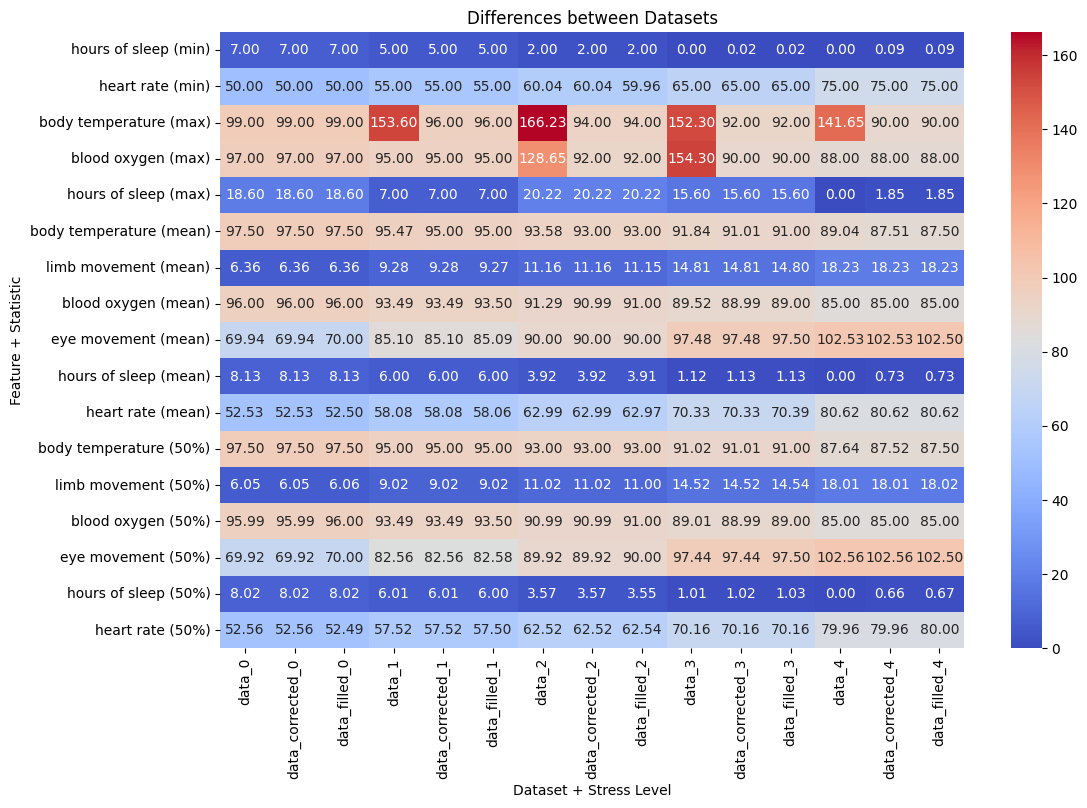

In [176]:
# Удаляем колонки 'Feature' и 'Statistic' из DataFrame
heatmap_data = differences.drop(columns=['Feature', 'Statistic'])

# Преобразуем данные в числовой формат
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')

# Устанавливаем 'Feature' + 'Statistic' как индекс
heatmap_data.index = differences['Feature'] + " (" + differences['Statistic'] + ")"

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")

# Улучшаем подписи
plt.title("Differences between Datasets")
plt.xlabel("Dataset + Stress Level")
plt.ylabel("Feature + Statistic")

plt.show()

Стандартный градиент улавливает только значительные различия. Попробуем увеличить количество цветов и добавим контрастность.

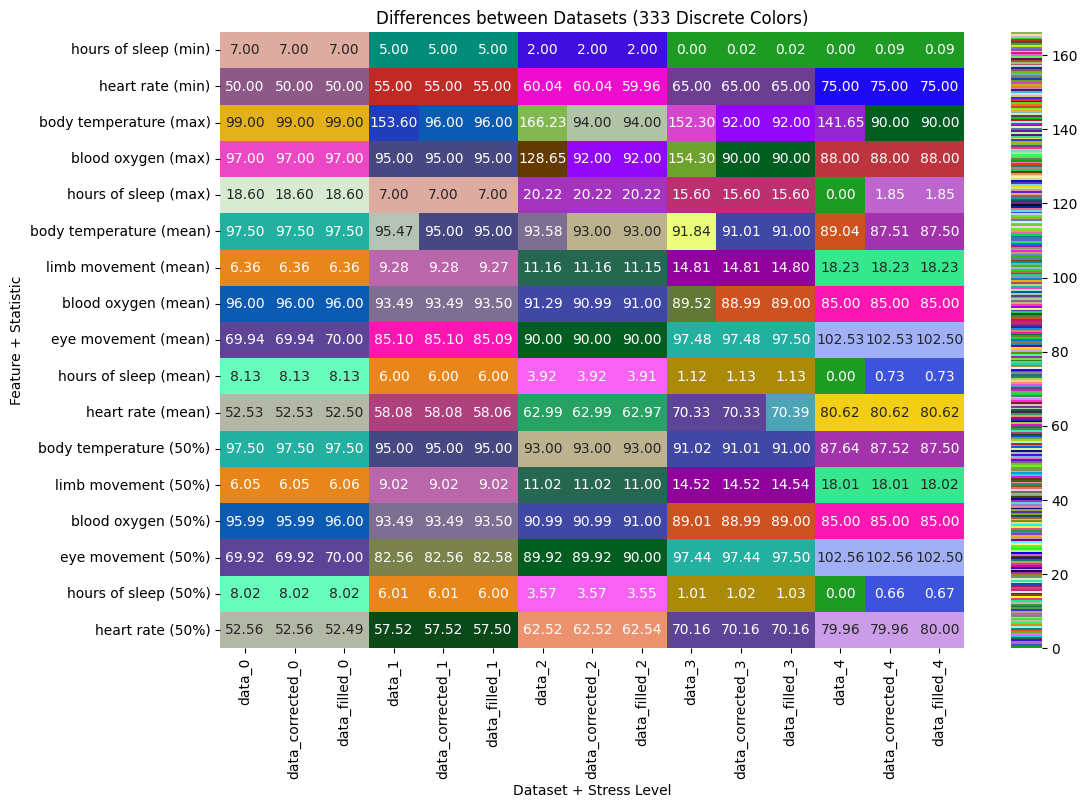

In [180]:
# Функция для генерации 333 контрастных цветов
def generate_contrast_colors(num_colors):
    np.random.seed(43)  # Для воспроизводимости
    colors = []
    for _ in range(num_colors):
        # Генерация случайного цвета в формате RGB
        color = np.random.rand(3)
        colors.append(color)
    return colors

# Генерация 333 контрастных цветов
num_colors = 333
contrast_colors = generate_contrast_colors(num_colors)

# Создание цветовой карты из сгенерированных цветов
custom_cmap = ListedColormap(contrast_colors)

# Построение тепловой карты с использованием дискретной цветовой карты
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap=custom_cmap,  # Используем дискретную цветовую карту
    fmt=".2f",
    vmin=heatmap_data.min().min(),  # Минимальное значение в данных
    vmax=heatmap_data.max().max()   # Максимальное значение в данных
)
plt.title("Differences between Datasets (333 Discrete Colors)")
plt.xlabel("Dataset + Stress Level")
plt.ylabel("Feature + Statistic")
plt.show()

Существенные отличия есть после обработки выбросов, а после заполнения пропусков уже разница незначительная или отсутсвует.

Посмотрим как признаки изменяются в зависимости от уровня стресса.

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

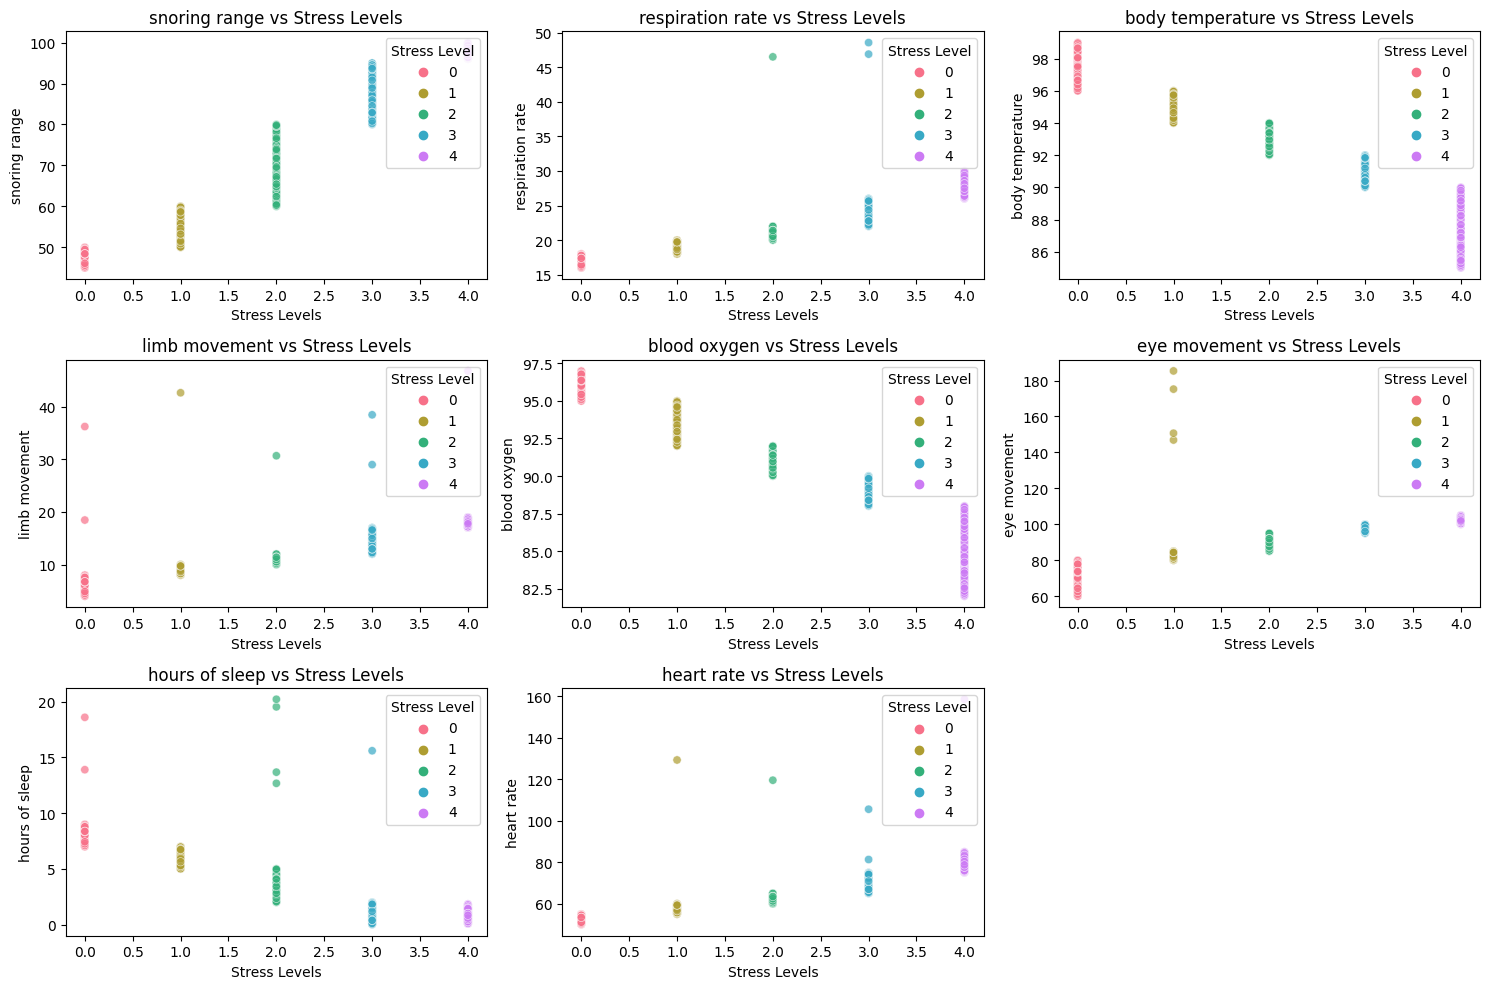

In [181]:
# Выбираем цветовую палитру
palette = sns.color_palette("husl", data_filled["Stress Levels"].nunique())

# Создаём графики для каждого показателя
features = data_filled.columns[:-1]  # Все столбцы, кроме "Stress Levels"
stress_column = "Stress Levels"

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Создаем сетку 3x3 (если признаков больше, можно поменять)
    sns.scatterplot(x=data[stress_column], y=data_filled[feature], hue=data_filled[stress_column], palette=palette, alpha=0.7)
    plt.xlabel("Stress Levels")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Stress Levels")
    plt.legend(title="Stress Level", loc="upper right")

plt.tight_layout()
plt.show()

Значения довольно хорошо сгруппированы, но есть пересечения диапазонов. Если сделать более крупную визуализацию, то это заметнее.

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

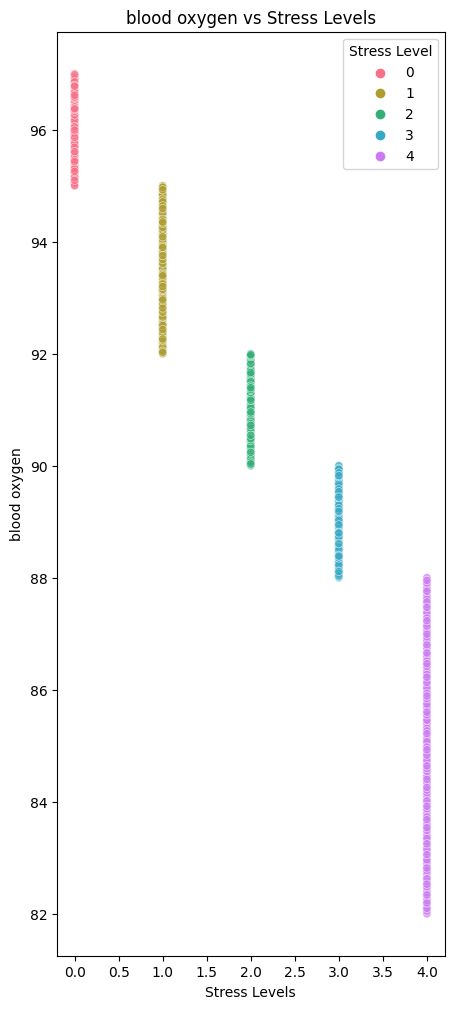

In [182]:
# Выбираем цветовую палитру
palette = sns.color_palette("husl", data_filled['Stress Levels'].nunique())

# Строим график
plt.figure(figsize=(5, 12))
sns.scatterplot(x=data_filled['Stress Levels'], y=data_filled['blood oxygen'], hue=data_filled['Stress Levels'], palette=palette, alpha=0.7)

plt.xlabel("Stress Levels")
plt.ylabel('blood oxygen')
plt.title(f"{'blood oxygen'} vs Stress Levels")
plt.legend(title="Stress Level", loc="upper right")

plt.show()

При этом пересечения не очень значительные. Попробуем определить условные границы интервалов значений для каждого уровня стресса (создать шкалу уровней стресса). Разбиение диапазона значений на равные интервалы не даст точный результат, т.к. невооружённым взглядом заметно, что интервалы разной длины.

In [204]:
# Список признаков
features = ['respiration rate', 'body temperature', 'limb movement', 
            'blood oxygen', 'eye movement', 'hours of sleep', 'heart rate']

# Признаки с обратной зависимостью
inverse_features = ['blood oxygen', 'hours of sleep', 'body temperature']

# Словарь для хранения границ интервалов
bins_dict = {}

# Разбиваем каждый признак на 5 равных интервалов
for feature in features:
    # Разбиение на 5 квантилей
    data_filled[f"{feature}_bin"], bins = pd.qcut(data_filled[feature], q=5, duplicates="drop", labels=False, retbins=True)
    
    # Сохраняем границы интервалов
    bins_dict[feature] = bins
    
    # Инвертируем порядок для признаков с обратной зависимостью
    if feature in inverse_features:
        data_filled[f"{feature}_bin"] = 4 - data_filled[f"{feature}_bin"]

# Выводим первые строки с новыми категориями
print("\nПервые строки с категориями:")
print(data_filled[['Stress Levels'] + [f"{f}_bin" for f in features]].head())

# Выводим средний "предсказанный" уровень стресса для каждой категории
data_grouped = data_filled.groupby('Stress Levels')[[f"{f}_bin" for f in features]].mean()
print("\nСредние значения категорий по уровням стресса:")
print(data_grouped)

# Выводим границы интервалов для каждого признака
print("\nГраницы интервалов (bins):")
for feature, bins in bins_dict.items():
    print(f"{feature}: {bins}")


Первые строки с категориями:
   Stress Levels  respiration rate_bin  body temperature_bin  \
0              3                     3                     3   
1              3                     3                     3   
2              1                     1                     1   
3              3                     3                     3   
4              0                     0                     0   

   limb movement_bin  blood oxygen_bin  eye movement_bin  hours of sleep_bin  \
0                  3                 3                 3                   3   
1                  3                 3                 3                   3   
2                  1                 1                 1                   1   
3                  3                 3                 3                   4   
4                  0                 0                 0                   0   

   heart rate_bin  
0               3  
1               3  
2               1  
3               3  
4   

In [205]:
# Словарь для хранения результатов по каждому признаку
class_wise_metrics = {}

# Перебираем признаки
for feature in features:
    y_true = data_filled['Stress Levels']  # Настоящие уровни стресса
    y_pred = data_filled[f"{feature}_bin"]  # Категории признака

    # Получаем отчёт классификации по классам
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

    # Оставляем только метрики по классам (игнорируем "accuracy" и "macro avg")
    class_metrics = {k: v['precision'] for k, v in report.items() if k.isdigit()}
    
    # Сохраняем в словарь
    class_wise_metrics[feature] = class_metrics

# Преобразуем в DataFrame
class_wise_df = pd.DataFrame(class_wise_metrics).T

# Выводим результат
print("\nТочность определения классов для каждого признака:")
print(class_wise_df)


Точность определения классов для каждого признака:
                        0        1        2        3        4
respiration rate 0.992126 0.992063 0.992000 0.976190 0.976190
body temperature 1.000000 0.992063 0.992063 0.992063 0.992126
limb movement    0.984127 0.976190 0.968254 0.952381 0.952381
blood oxygen     1.000000 0.992063 0.992063 0.992063 0.992126
eye movement     0.992126 0.968000 0.968254 0.968254 0.968254
hours of sleep   0.960317 0.960317 0.960317 0.595238 0.603175
heart rate       0.992126 0.992000 0.984127 0.968254 0.968254


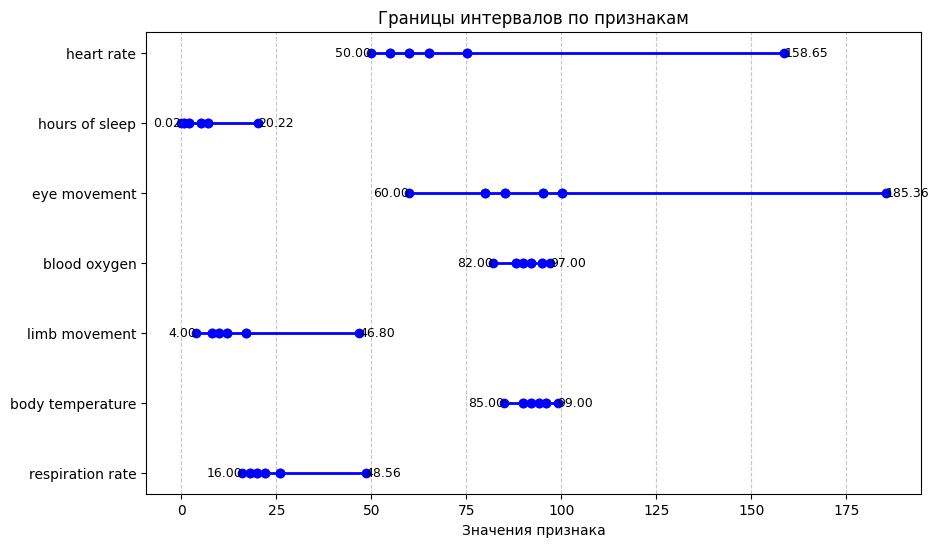

In [208]:
plt.figure(figsize=(10, 6))

# Перебираем признаки
for i, (feature, bins) in enumerate(bins_dict.items()):
    # Отображаем отрезки интервалов
    for j in range(len(bins) - 1):
        plt.plot([bins[j], bins[j+1]], [i, i], marker='o', color='b', lw=2)  # Границы интервала
    
    # Подписи значений
    plt.text(bins[0], i, f"{bins[0]:.2f}", va='center', ha='right', fontsize=9, color='black')
    plt.text(bins[-1], i, f"{bins[-1]:.2f}", va='center', ha='left', fontsize=9, color='black')

plt.yticks(range(len(bins_dict)), bins_dict.keys())  # Названия признаков
plt.xlabel("Значения признака")
plt.title("Границы интервалов по признакам")
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

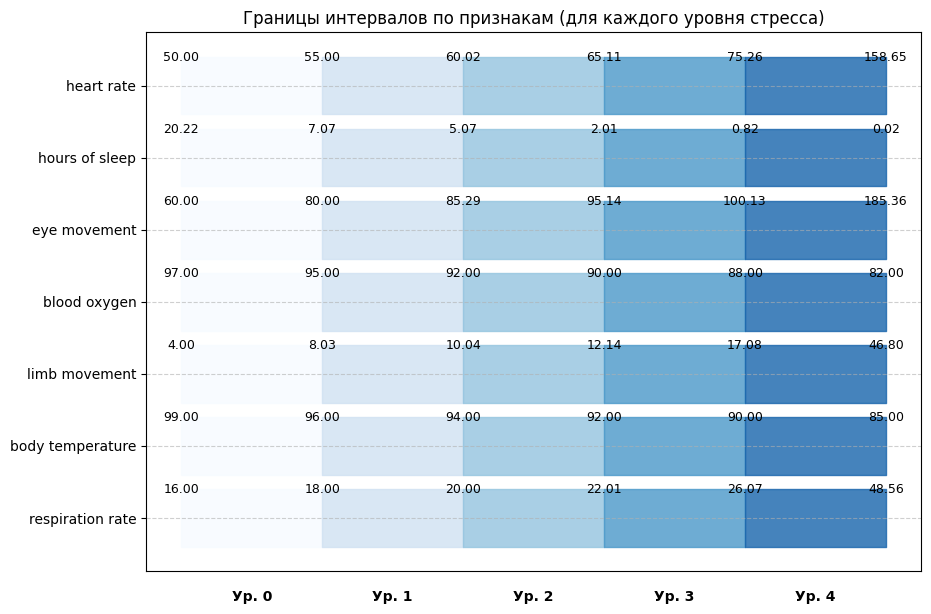

In [220]:
# Создаём новый словарь, где границы перевернуты только для инвертированных признаков
bins_dict_inverted = {}
for feature, bins in bins_dict.items():
    bins_dict_inverted[feature] = bins[::-1] if feature in inverse_features else bins

# Определяем количество уровней стресса (по количеству интервалов)
stress_levels = list(range(len(next(iter(bins_dict_inverted.values()))) - 1))

# Настройки графика
plt.figure(figsize=(10, 7))
cmap = plt.get_cmap("Blues")  # Градиент

# Перебираем признаки и строим шкалу
for i, (feature, bins) in enumerate(bins_dict_inverted.items()):
    num_intervals = len(bins) - 1  # Количество интервалов

    for j in range(num_intervals):
        color = cmap(j / num_intervals)  # Градиентный цвет

        # Рисуем полосы (без наложения)
        plt.fill_betweenx([i - 0.4, i + 0.4], j, j + 1, color=color, alpha=0.8)

        # Границы интервалов
        left, right = bins[j], bins[j + 1]

        # Выводим границы значений
        plt.text(j, i + 0.3, f"{left:.2f}", ha='center', va='bottom', fontsize=9, color='black')
        if j == num_intervals - 1:
            plt.text(j + 1, i + 0.3, f"{right:.2f}", ha='center', va='bottom', fontsize=9, color='black')

# Добавляем подписи уровней стресса
for j, level in enumerate(stress_levels):
    plt.text(j + 0.5, -1, f"Ур. {level}", ha='center', va='top', fontsize=10, fontweight='bold', color='black')

# Настройки осей
plt.yticks(range(len(bins_dict_inverted)), bins_dict_inverted.keys())  # Названия признаков
plt.xticks([])  # Убираем значения по X
#plt.xlabel("Категории (равномерные)")
plt.title("Границы интервалов по признакам (для каждого уровня стресса)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

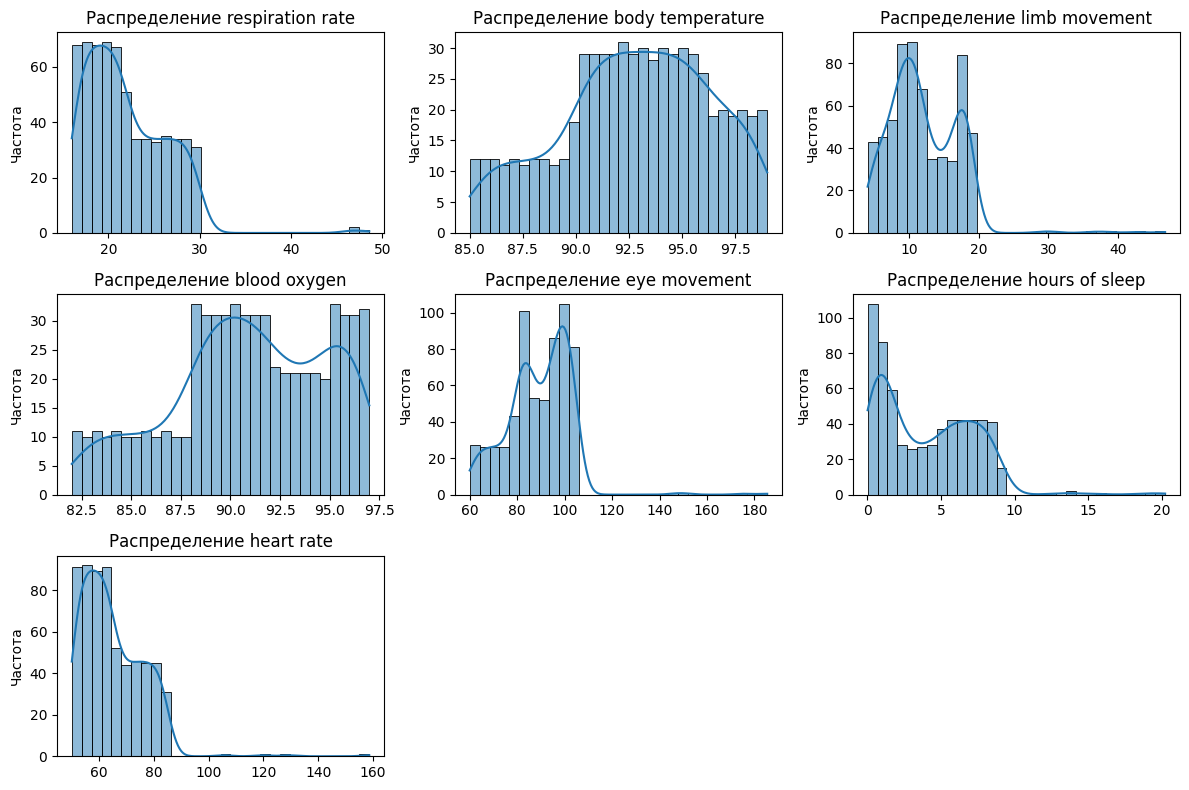

In [221]:
# Размеры фигуры
plt.figure(figsize=(12, 8))

# Строим гистограммы для всех признаков
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Размещение в сетке (3x3)
    sns.histplot(data_filled[feature], bins=30, kde=True)
    plt.title(f"Распределение {feature}")
    plt.xlabel("")
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

Есть смещения и многомодальные распределения.

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

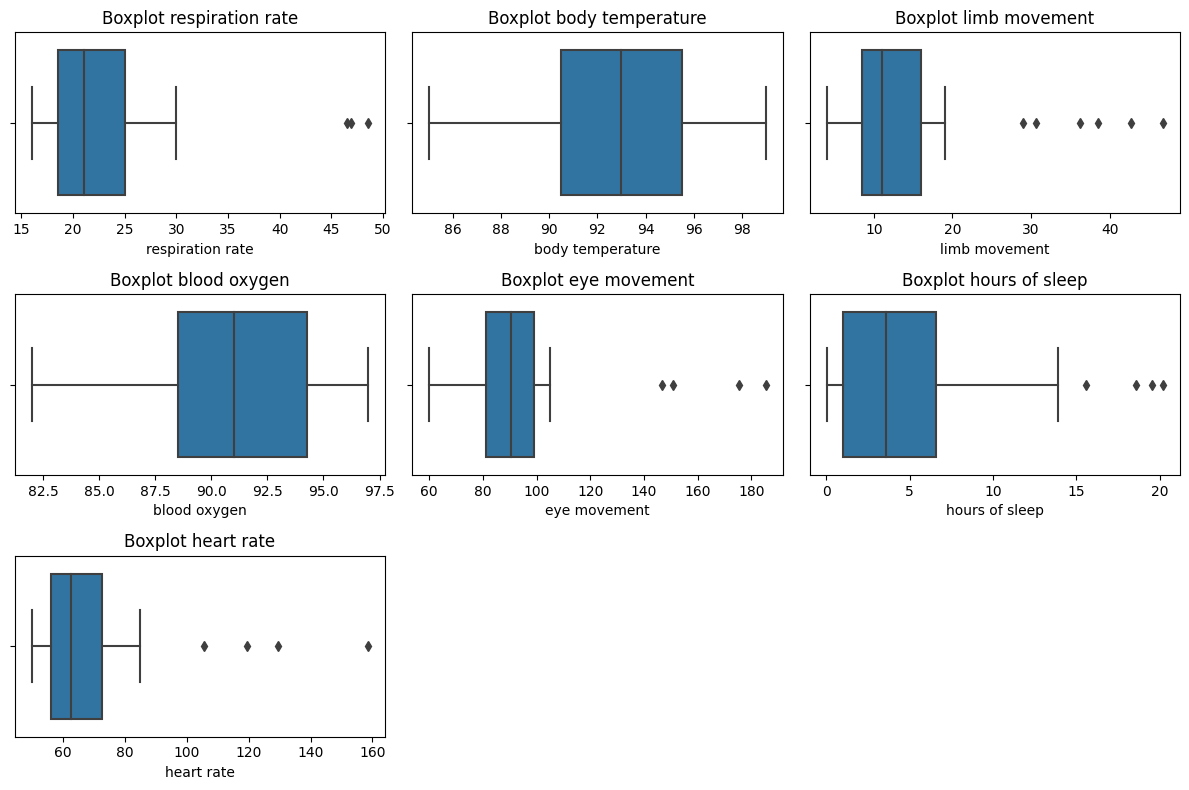

In [222]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_filled[feature])
    plt.title(f"Boxplot {feature}")

plt.tight_layout()
plt.show()

Для каждого из показателей наблюдается значительный разброс значений, что указывает на вариабельность данных.
Разные физиологические показатели имеют разные диапазоны значений (что логично).
Широкие диапазоны значений могут указывать на наличие выбросов или аномалий в данных.

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

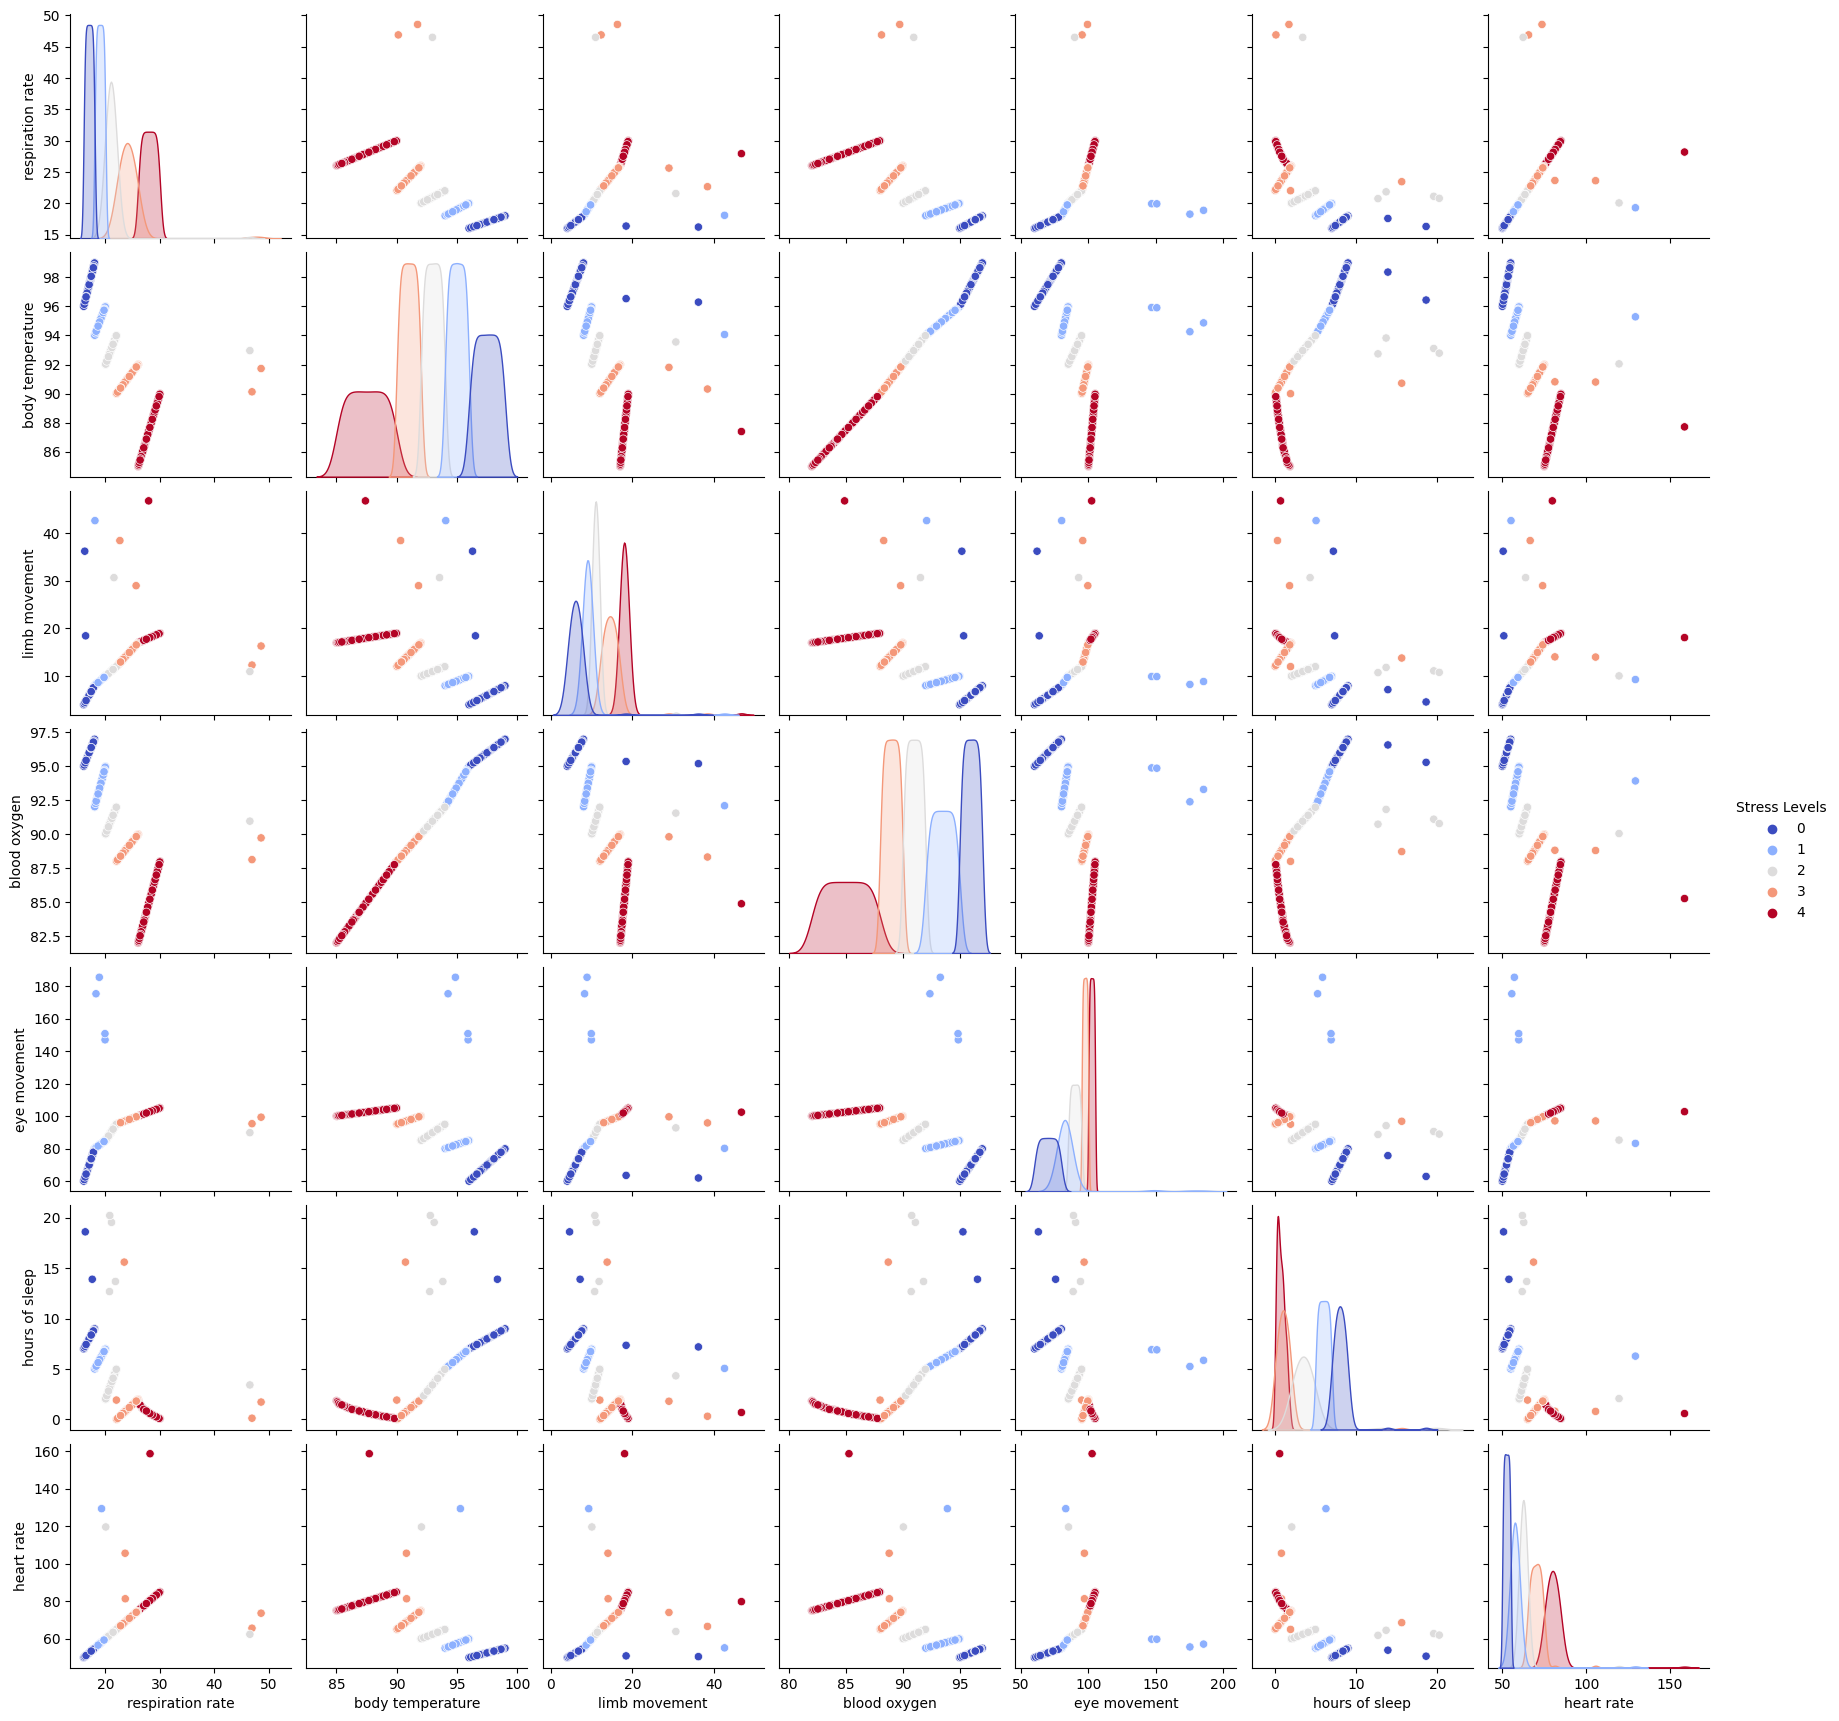

In [223]:
sns.pairplot(data_filled[features + ["Stress Levels"]], hue="Stress Levels", palette="coolwarm")
plt.show()

C:\Users\ela96\AppData\Local\Temp\ipykernel_10056\3132181481.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Stress Levels", y=feature, data=data_filled, ci=None, palette="coolwarm")
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categori

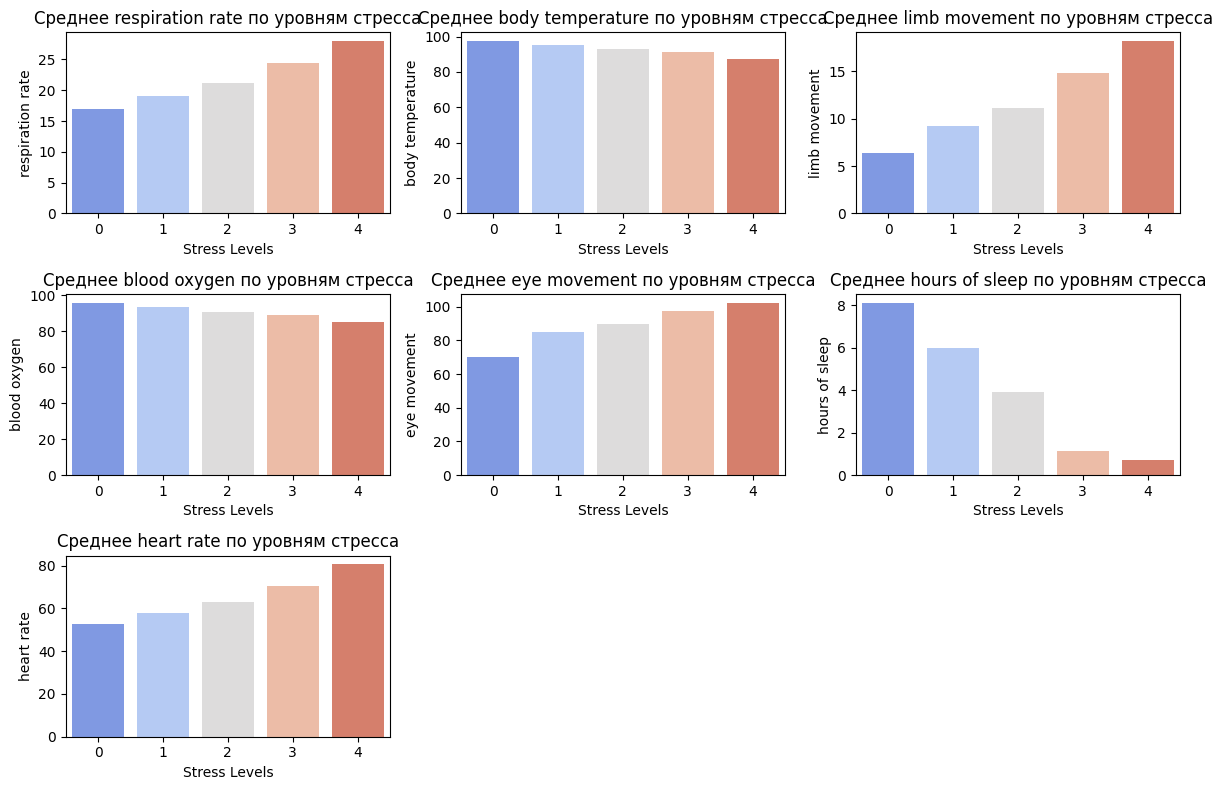

In [224]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x="Stress Levels", y=feature, data=data_filled, ci=None, palette="coolwarm")
    plt.title(f"Среднее {feature} по уровням стресса")

plt.tight_layout()
plt.show()

Наблюдается взаимосвязь между уровнями стресса и изменениями в физиологических показателях, таких как снижение уровня кислорода в крови или увеличение частоты сердечных сокращений при высоком стрессе.

C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ela96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

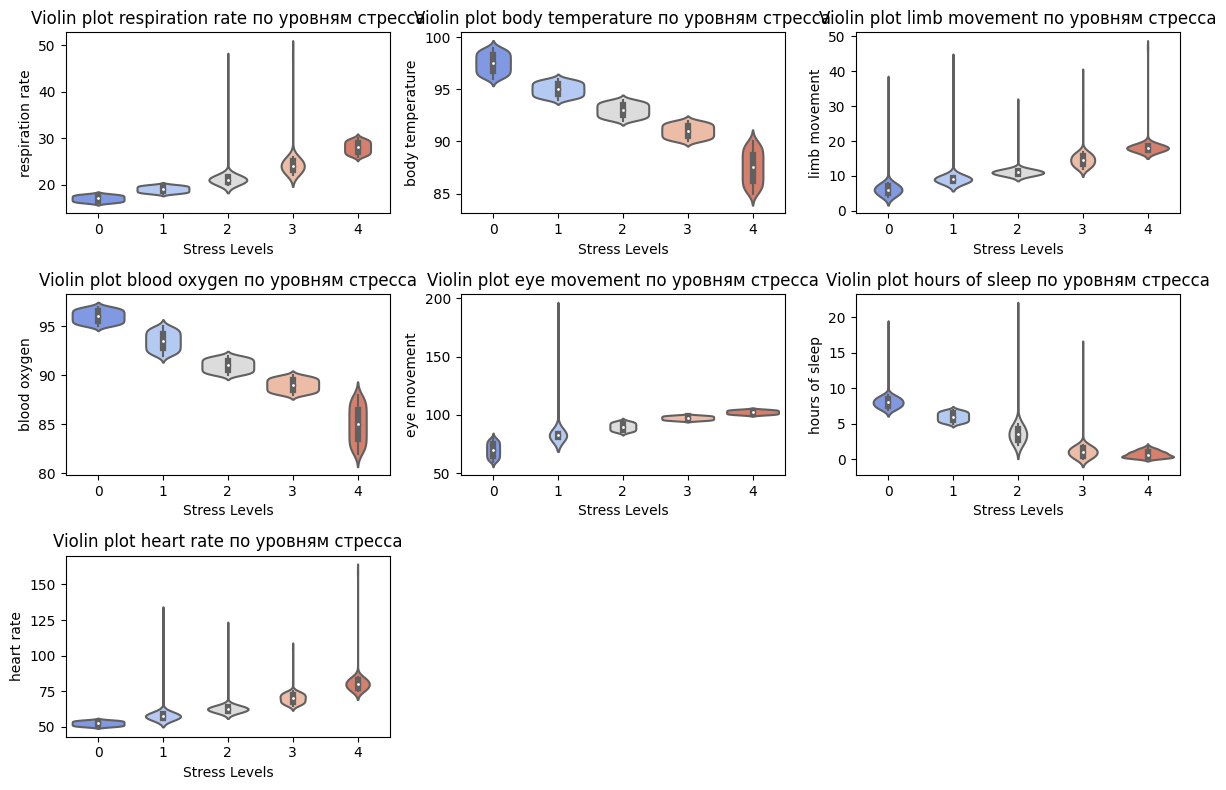

In [225]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x="Stress Levels", y=feature, data=data_filled, palette="coolwarm")
    plt.title(f"Violin plot {feature} по уровням стресса")

plt.tight_layout()
plt.show()

Были проведены анализ и обработка данных:
выявлены и обработаны явно ошибочные значения,
выявлены и обработаны пропуски,
выявлены аномальные значения, которые могут быть выбросами или свидетельствовать о более широких диапазонах возможных значений признаков, поэтому обработаны не были.
Восстановление данных проведено на основе значений из подобных наблюдений (подобие определялось по наиболее коррелирующему признаку).
Сравнение статистик исходных и обработанных данных говорит о том, что ошибочные значения вносили заметные искажения в общую картину. 

Значения по признакам\уровням стресса довольно хорошо сгруппированы, поэтому была создана шкала уровней стресса, которая позволяет с большой долей вероятности определить уровень стресса по значениям одного или нескольких физиологически показателей. Кроме этого данную шкалу можно использовать как эталонную при оценке качества моделей на следующих этапах.

Если говорить о данных в разрезе распределений признаков, то есть смещения и многомодальные распределения.
Для каждого из показателей наблюдается значительный разброс значений, что указывает на вариабельность данных.
Восстановленные данные по hours of sleep не идеально ложатся в общие тенденции, требуют дополнительной обработки\исследований.
Остальные признаки очень хорошо коррелированы с уровнем стресса. Наблюдается взаимосвязь между уровнями стресса и изменениями в физиологических показателях, таких как снижение уровня кислорода в крови или увеличение частоты сердечных сокращений при высоком стрессе. Кроме этого между многими признаками также есть высокая корреляция, поэтому для обучения модели полный набор признаков может быть избыточным. Проведём отбор необходимых признаков на следующем этапе.